# Airline Flight Arrival Prediction

## Objective  
Predict the number of arriving flights at an airport using regression. 

## Dataset  
- Contains flight details, airline information, airport data, and delay causes.  
- **Target:** arr_flights (continuous numerical variable representing the number of arriving flights).
- The dataset can be accessed here: [Airline Delay Cause Dataset](https://www.kaggle.com/datasets/ramyhafez/airline-delay-cause).  

## Preprocessing  
- Handled missing values, outliers, and skewness.  
- Encoded categorical features and applied scaling.  
- Applied **cyclical encoding** for the month feature using sine and cosine transformations.

## Model Architecture  
- **Input:** Feature vector (79 dimensions)  
- **Hidden Layers:**  
  - Dense (8 neurons, Tanh activation)  
  - Dense (256 neurons, Sigmoid activation)  
  - Dense (128 neurons, Tanh activation)  
  - Dropout (0.3)  
  - Dense (64 neurons, Tanh activation)  
  - Dense (32 neurons, Tanh activation)  
  - Dropout (0.2)  
- **Output:** 1 neuron (Linear activation)

## Training Details  
- **Optimizer:** AdamW  
- **Loss Function:** Mean Squared Error (MSE)  
- **Metric:** Mean Squared Error (MSE)  
- **Early Stopping:** Based on validation loss

## Results  
- **Mean Absolute Error (MAE):** 0.2532  
- **Mean Squared Error (MSE):** 0.1149  
- **Median Absolute Error:** 0.1951  
- **R² Score:** 0.8861

##### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import AdamW
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

##### Loading The Case Data

In [2]:
df = pd.read_csv('data/Airline_Delay_Cause.csv')
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


#### Verifying Basic Data Integrity

##### Inspecting Data 

In [3]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [4]:
df.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0
318016,2003,6,DL,Delta Air Lines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",3466.0,454.0,121.15,7.61,...,1.0,102.33,9.0,0.0,16853.0,5384.0,306.0,5686.0,28.0,5449.0


In [5]:
df.sample(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
74695,2018,9,OO,SkyWest Airlines Inc.,TYS,"Knoxville, TN: McGhee Tyson",198.0,56.0,19.25,1.63,...,0.00,22.52,6.0,1.0,4955.0,2505.0,202.0,567.0,0.0,1681.0
228964,2008,6,MQ,American Eagle Airlines Inc.,CLL,"College Station/Bryan, TX: Easterwood Field",86.0,18.0,10.71,1.28,...,0.00,3.42,0.0,0.0,894.0,512.0,60.0,68.0,0.0,254.0
194009,2010,6,YV,Mesa Airlines Inc.,BFL,"Bakersfield, CA: Meadows Field",90.0,11.0,8.00,0.00,...,0.00,1.95,0.0,0.0,679.0,583.0,0.0,22.0,0.0,74.0
37012,2020,7,OO,SkyWest Airlines Inc.,GCC,"Gillette, WY: Gillette Campbell County",34.0,1.0,1.00,0.00,...,0.00,0.00,0.0,0.0,33.0,33.0,0.0,0.0,0.0,0.0
185827,2010,11,FL,AirTran Airways Corporation,HPN,"White Plains, NY: Westchester County",141.0,10.0,0.85,0.00,...,0.00,3.98,1.0,1.0,809.0,18.0,0.0,245.0,0.0,546.0
16252,2021,8,MQ,Envoy Air,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",272.0,34.0,7.98,0.00,...,0.64,13.13,0.0,0.0,1686.0,309.0,0.0,562.0,69.0,746.0
139659,2013,11,FL,AirTran Airways Corporation,PHL,"Philadelphia, PA: Philadelphia International",178.0,29.0,9.60,0.00,...,0.00,11.10,1.0,0.0,1206.0,324.0,0.0,343.0,0.0,539.0
147845,2013,5,MQ,American Eagle Airlines Inc.,MSP,"Minneapolis, MN: Minneapolis-St Paul Internati...",195.0,68.0,16.84,7.95,...,0.00,22.53,6.0,0.0,4595.0,929.0,785.0,1016.0,0.0,1865.0
494,2022,5,F9,Frontier Airlines Inc.,BUF,"Buffalo, NY: Buffalo Niagara International",104.0,27.0,13.32,0.00,...,0.00,6.98,2.0,0.0,1463.0,658.0,0.0,357.0,0.0,448.0
289180,2005,3,OH,Comair Inc.,AUS,"Austin, TX: Austin - Bergstrom International",61.0,23.0,14.50,1.00,...,0.00,0.00,3.0,0.0,960.0,637.0,122.0,201.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [7]:
df.shape

(318017, 21)

In [8]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [9]:
df[df.columns[2:6]]

,carrier,carrier_name,airport,airport_name
0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ..."
1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional"
2,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial"
3,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International"
4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field"
...,...,...,...,...
318012,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International"
318013,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International"
318014,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern..."
318015,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International"


In [10]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,318017.000000,318017.000000,317524.000000,317285.000000,317525.000000,317523.000000,317529.000000,317529.000000,317529.000000,317529.000000,317527.000000,317523.000000,317525.000000,317529.000000,317529.000000,317527.000000,317529.000000
mean,2012.450957,6.497844,381.766670,72.905076,21.073149,2.616407,24.005228,0.179037,24.975734,7.207257,0.867674,4209.989113,1286.577224,220.567542,1099.516422,7.214845,1596.062993
std,5.678296,3.459423,1027.156722,198.936754,47.671580,9.968640,85.113757,0.844834,75.275223,37.216301,3.915772,12519.021012,3515.417309,861.521440,4636.475908,38.854685,4924.950687
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.000000,0.000000,1.680000,0.000000,1.640000,0.000000,0.000000,436.000000,148.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.190000,0.580000,5.490000,0.000000,5.860000,1.000000,0.000000,1201.000000,437.000000,25.000000,203.000000,0.000000,351.000000
75%,2018.000000,10.000000,273.000000,56.000000,19.690000,2.000000,15.350000,0.000000,17.040000,4.000000,1.000000,3080.000000,1100.000000,159.000000,602.000000,0.000000,1110.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


In [11]:
df.describe(include=['O'])

,carrier,carrier_name,airport,airport_name
count,318013,318013,318014,318017
unique,29,33,420,420
top,OO,SkyWest Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,38145,38145,3022,3022


##### Count Duplicate Rows in DataFrame

In [12]:
sum(df.duplicated())

0

##### Count Missing Values per Column

In [13]:
df.isnull().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

##### Calculate Skewness of Numerical Columns

In [14]:
df.skew(numeric_only=True)

year                    0.060822
month                   0.000352
arr_flights             7.673897
arr_del15               8.170049
carrier_ct              7.995877
weather_ct             21.640430
nas_ct                 11.787748
security_ct            16.466670
late_aircraft_ct        7.710498
arr_cancelled          32.361878
arr_diverted           16.613205
arr_delay               9.122761
carrier_delay          10.630764
weather_delay          17.351633
nas_delay              13.627479
security_delay         22.004087
late_aircraft_delay     8.577760
dtype: float64

##### Visualize Numerical Column Correlations with Heatmap

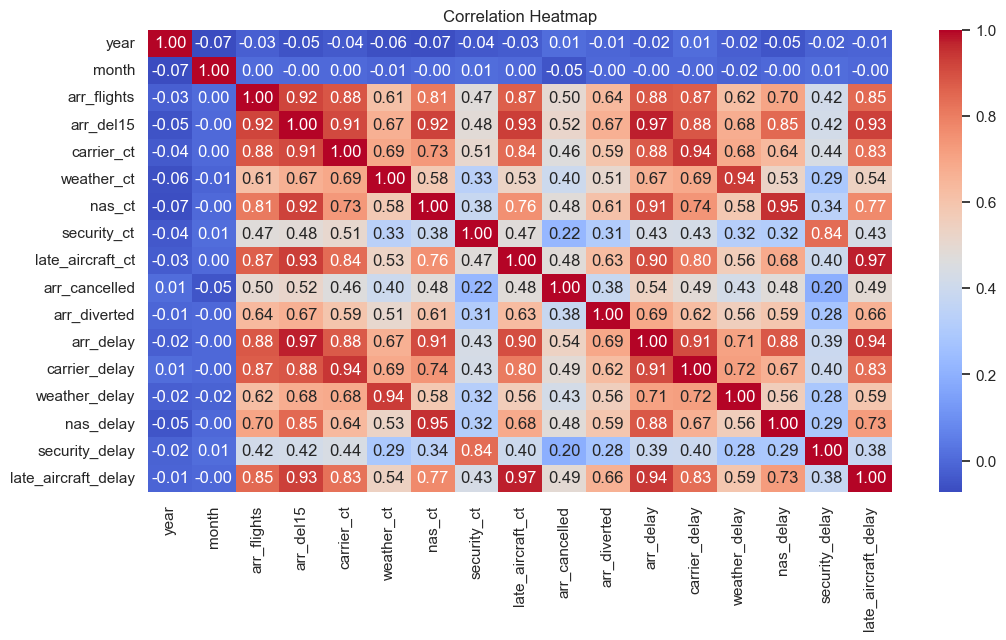

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Data Cleaning and Preprocessing

##### Handling the missing values

In [16]:
categorical_cols = ['carrier', 'carrier_name', 'airport', 'airport_name']
categorical_cols

['carrier', 'carrier_name', 'airport', 'airport_name']

In [17]:
numerical_cols = [col for col in df.columns if col not in categorical_cols]
numerical_cols

['year',
 'month',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

In [18]:
df.isnull().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [19]:
df[numerical_cols].isnull().sum()

year                     0
month                    0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

##### Visualize Numerical Column Distributions with Histograms and Skewness

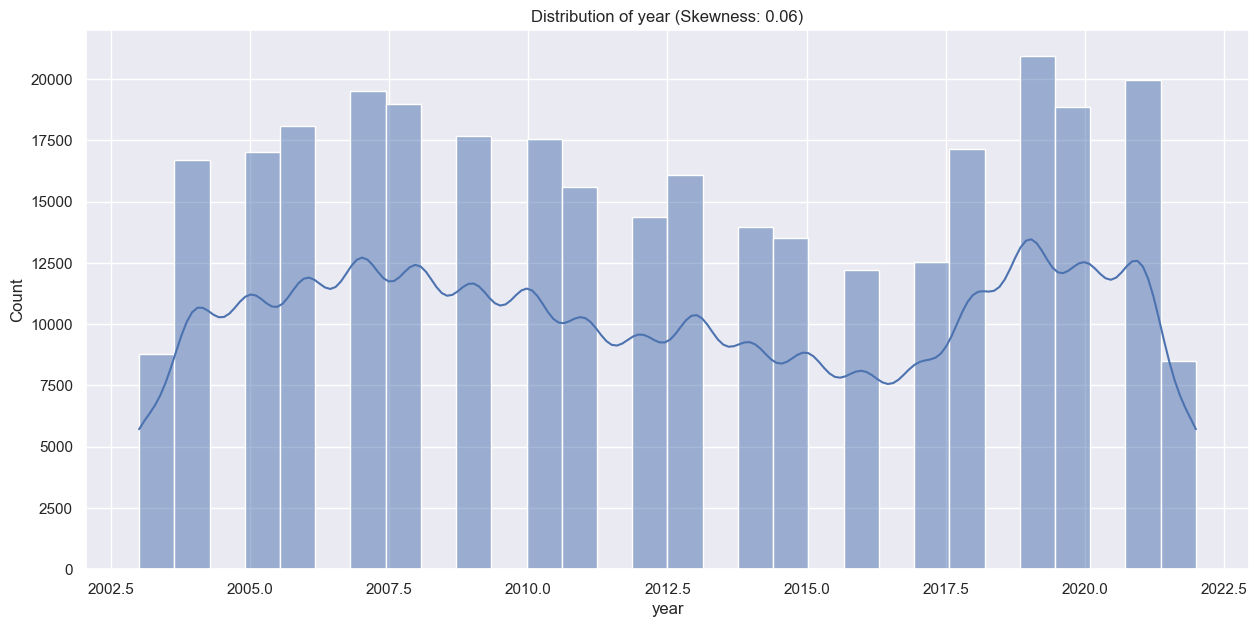

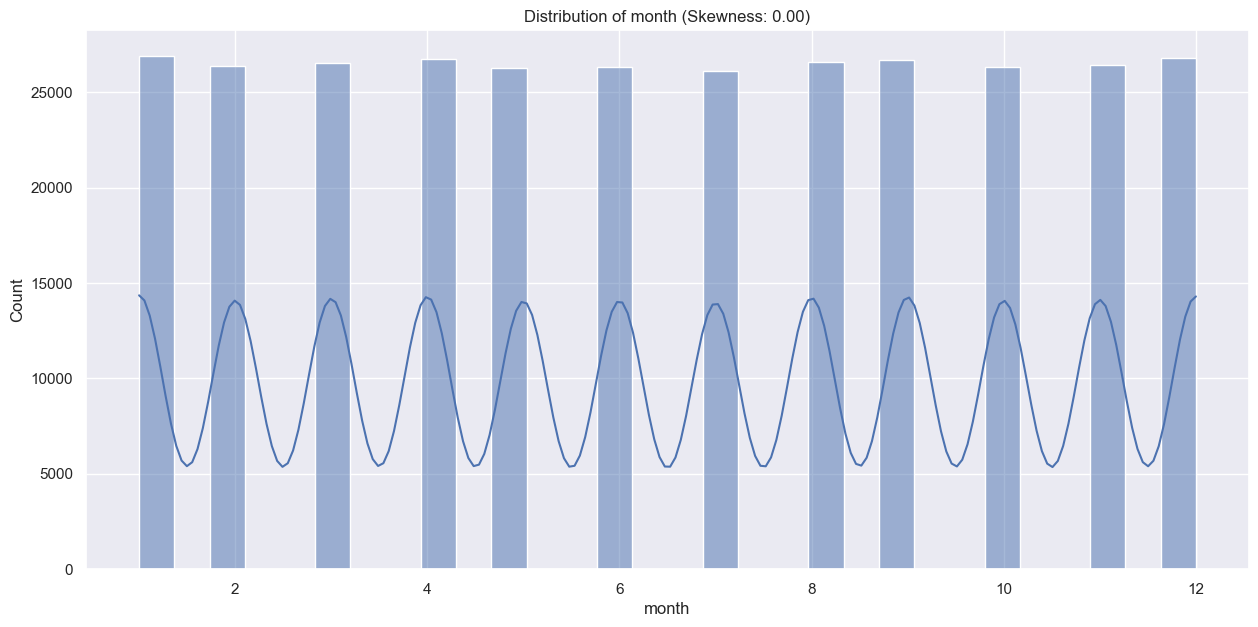

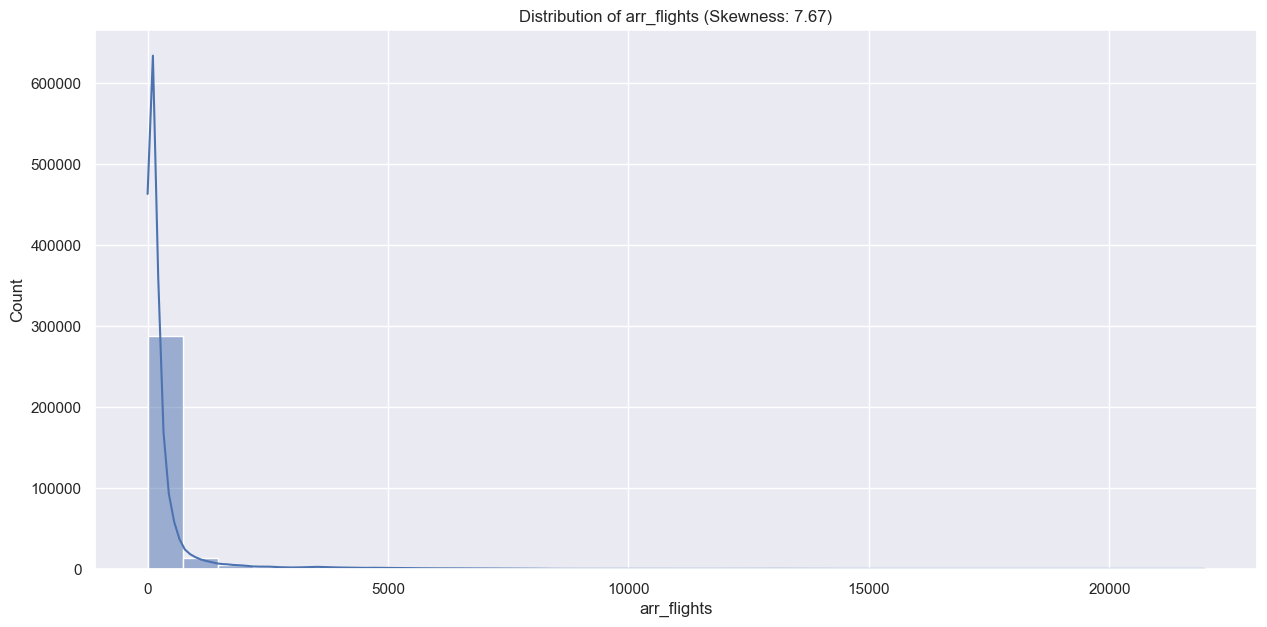

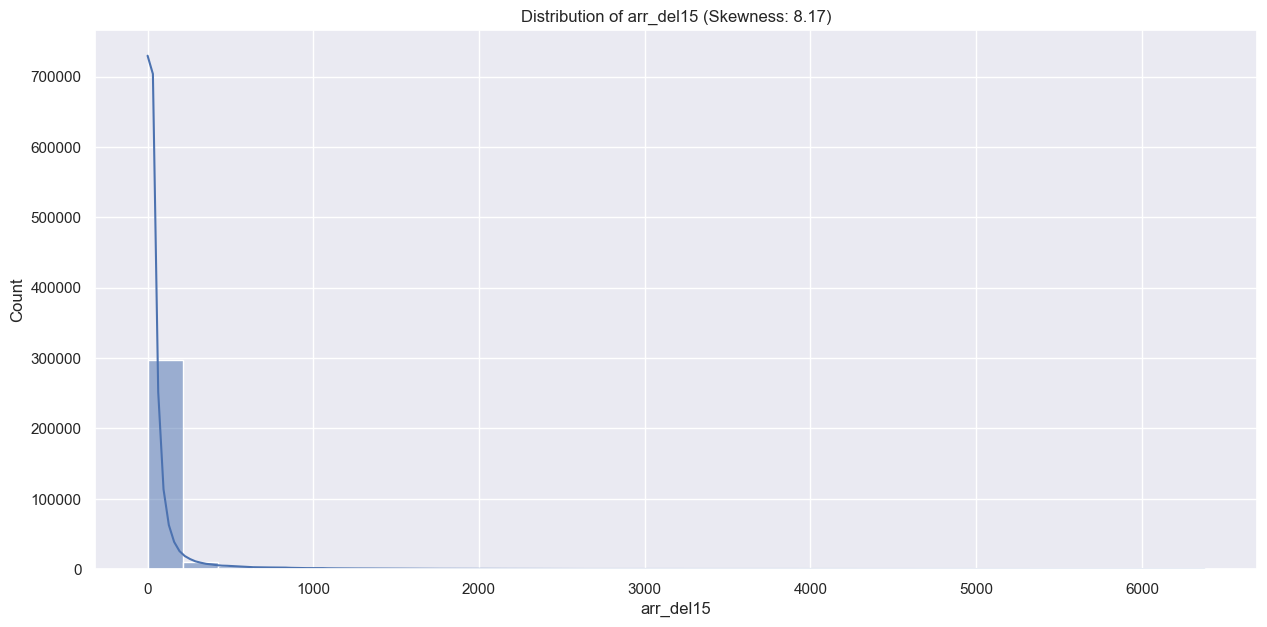

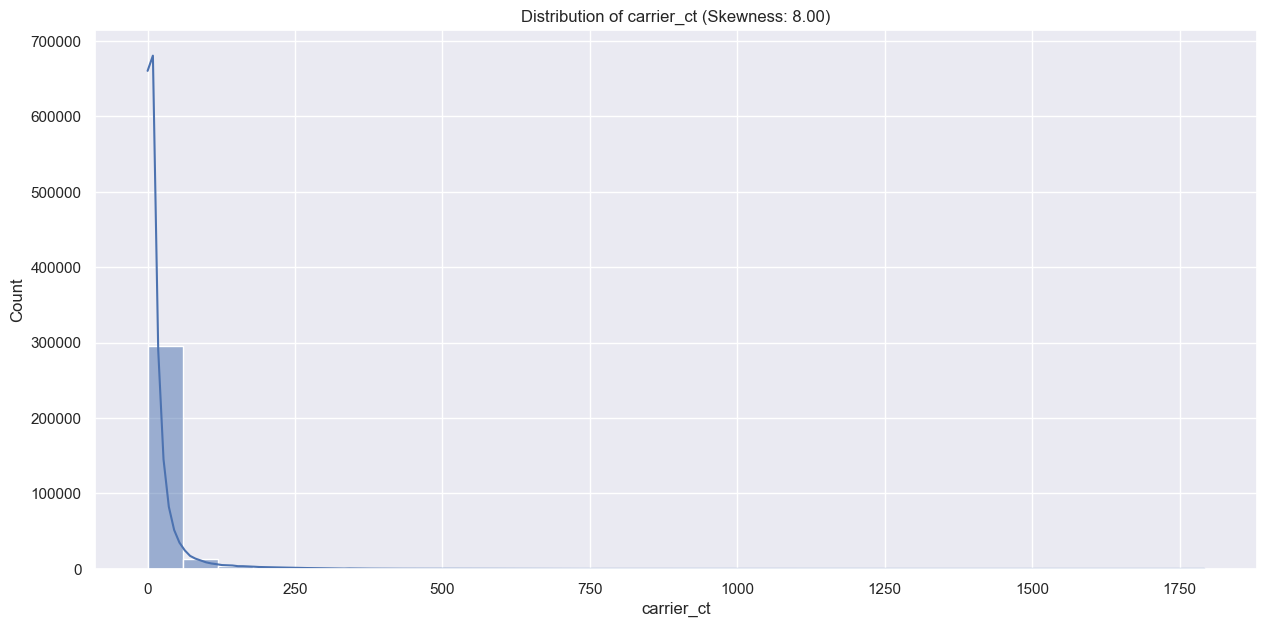

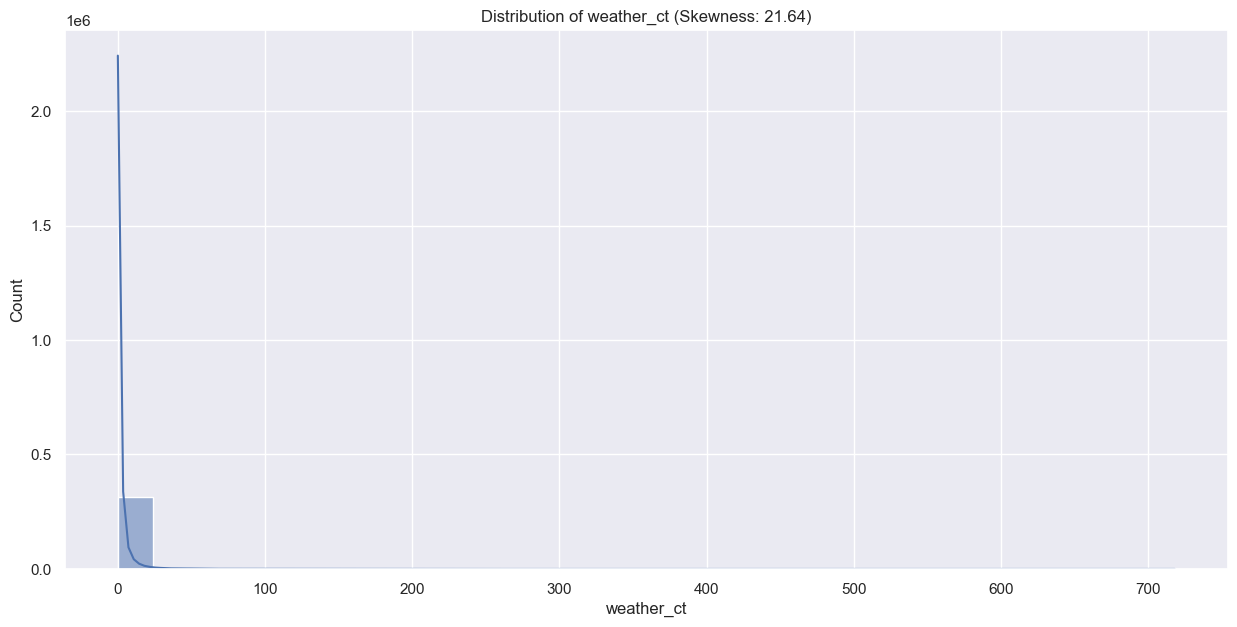

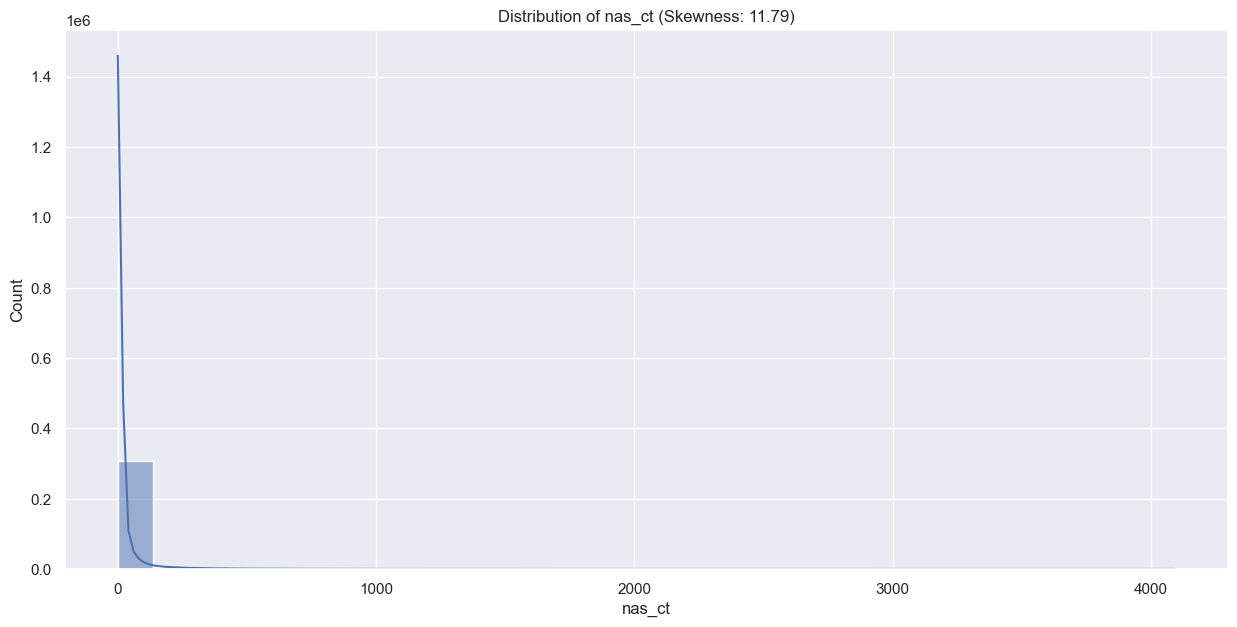

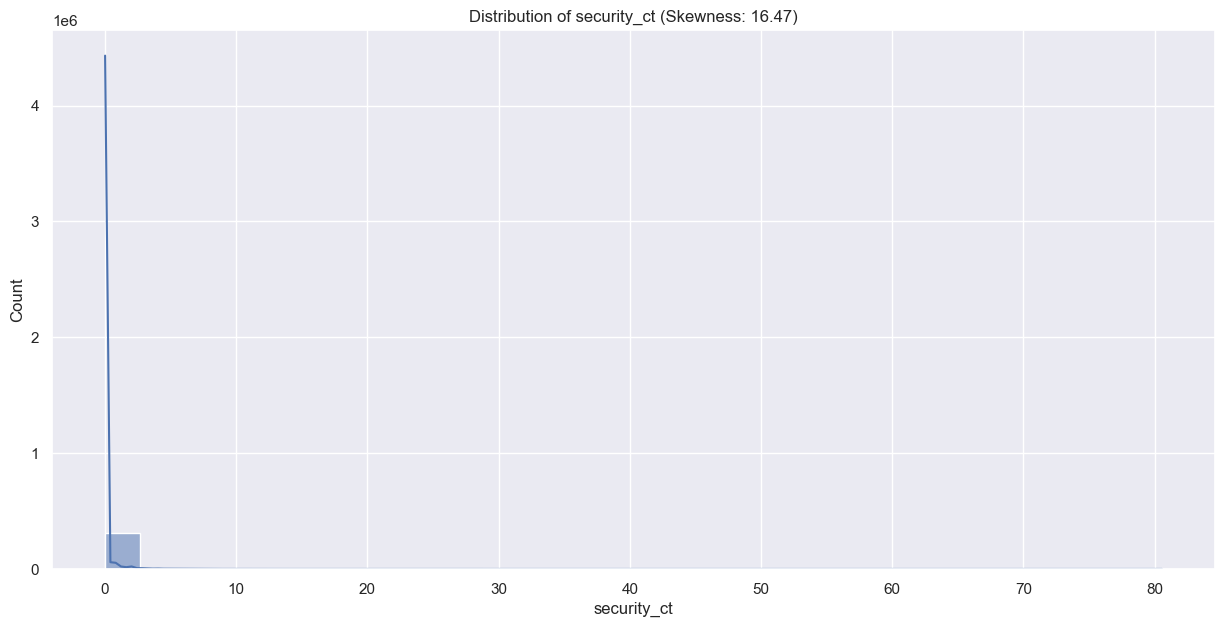

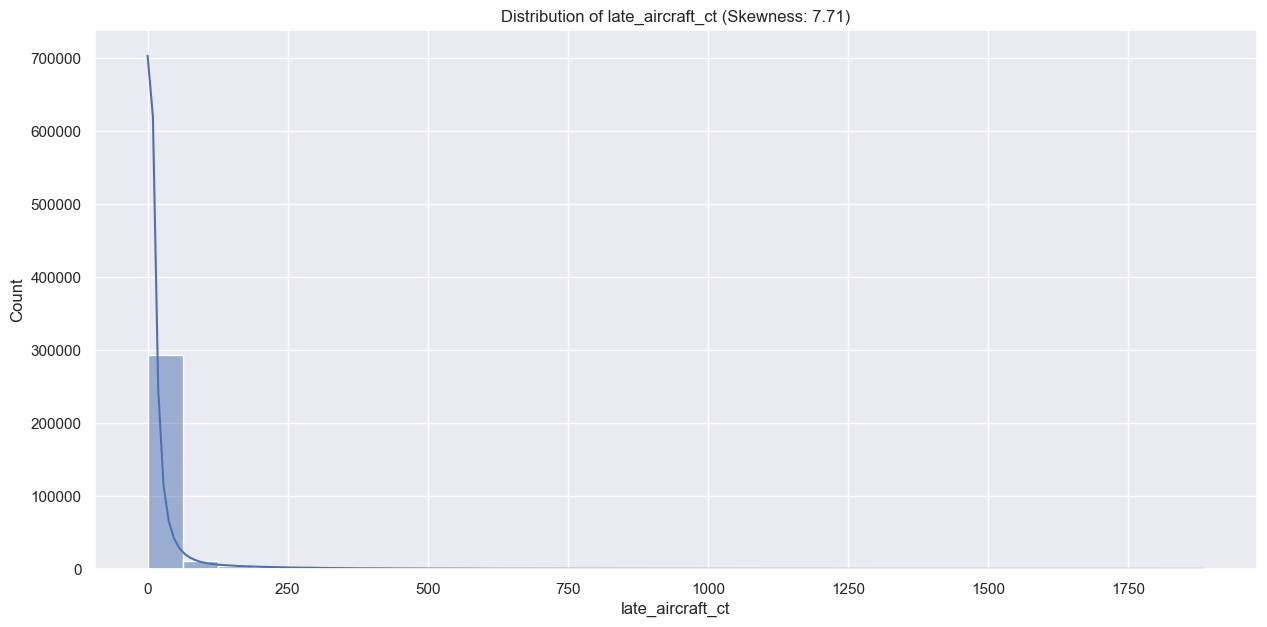

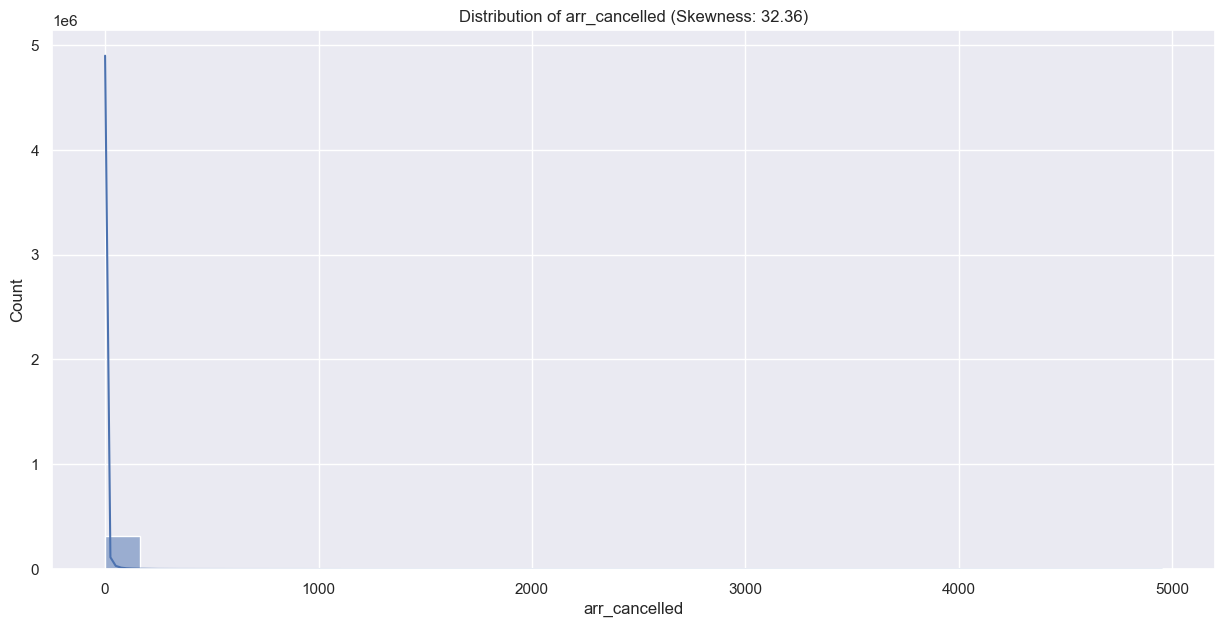

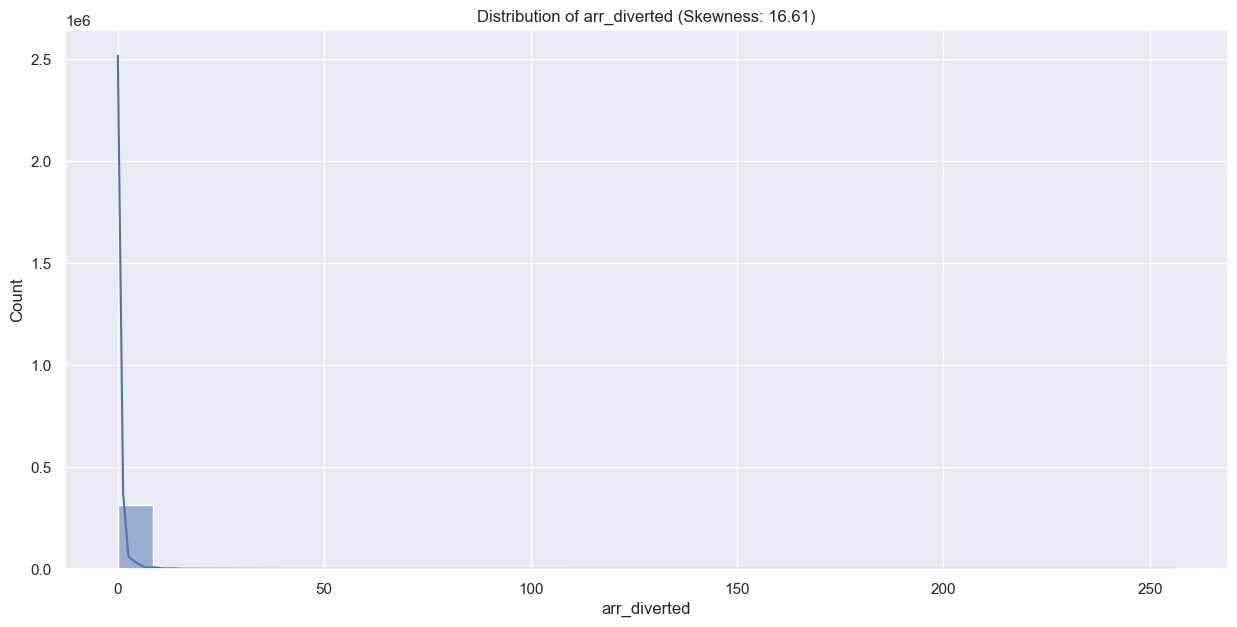

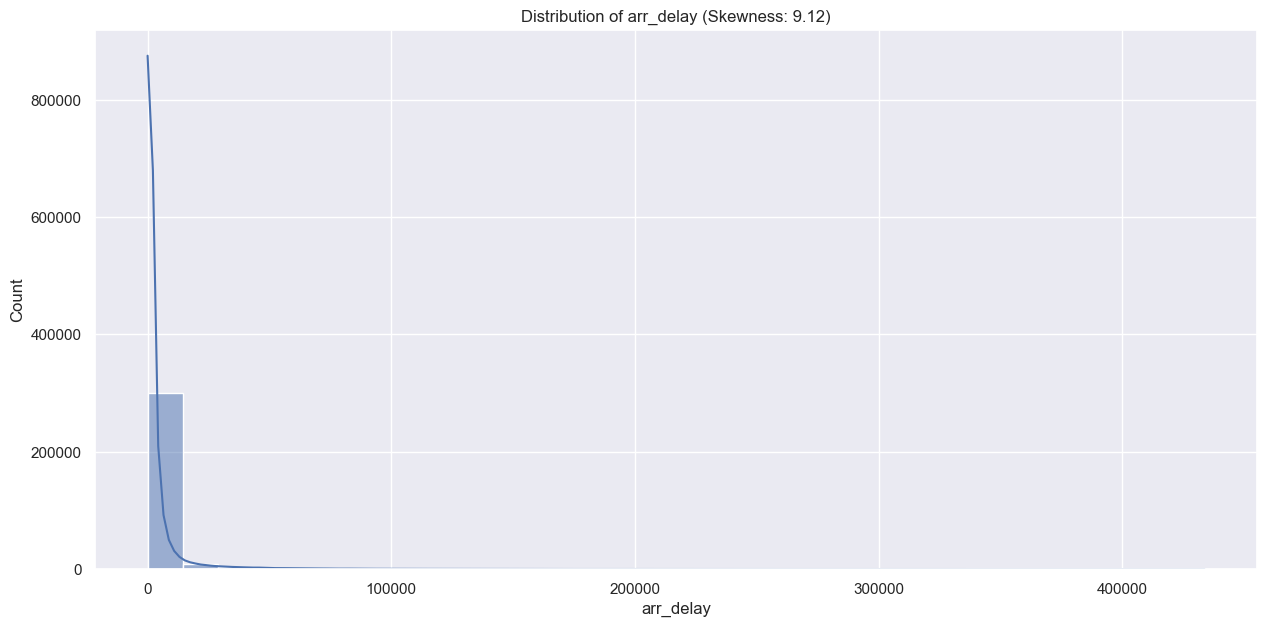

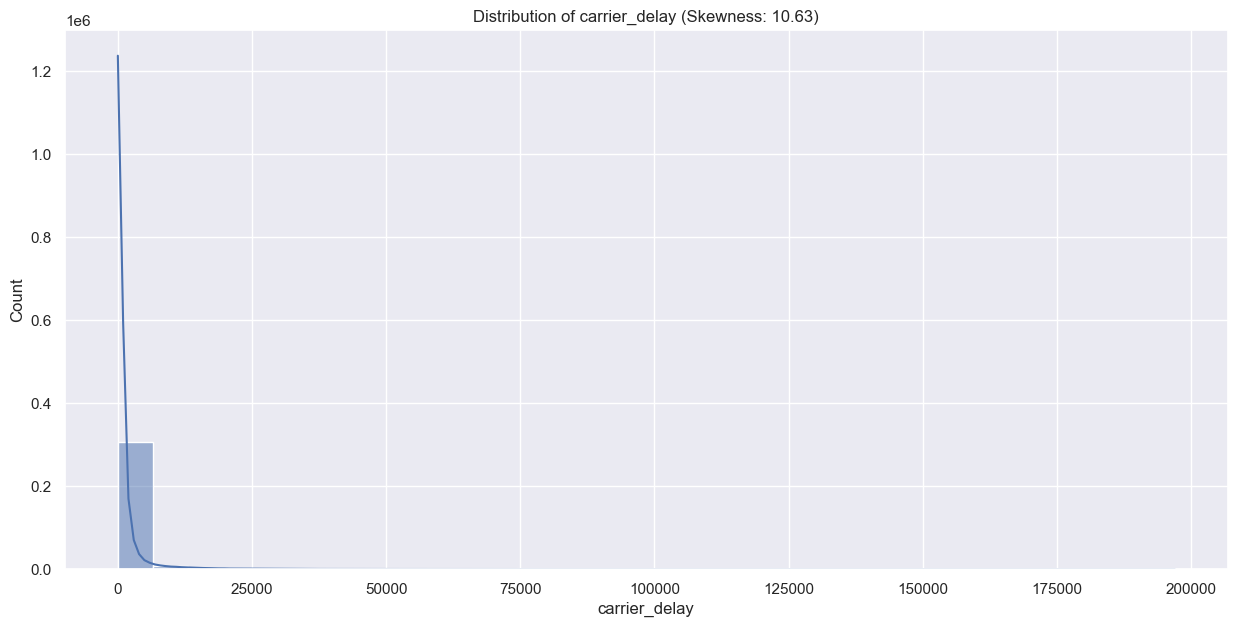

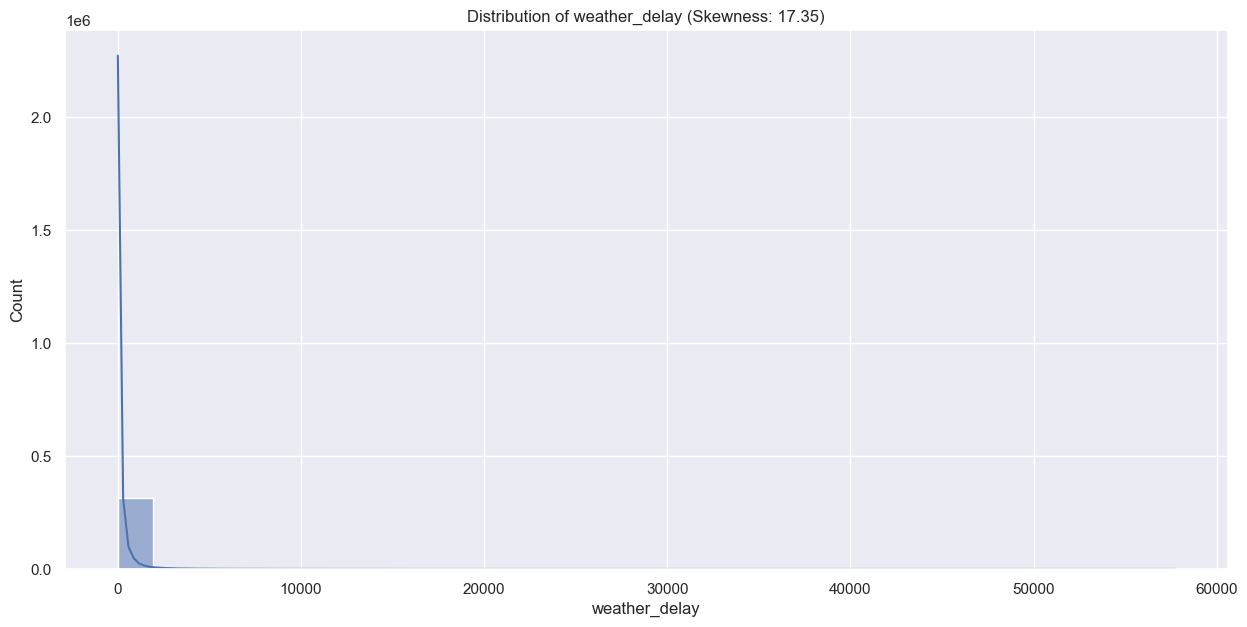

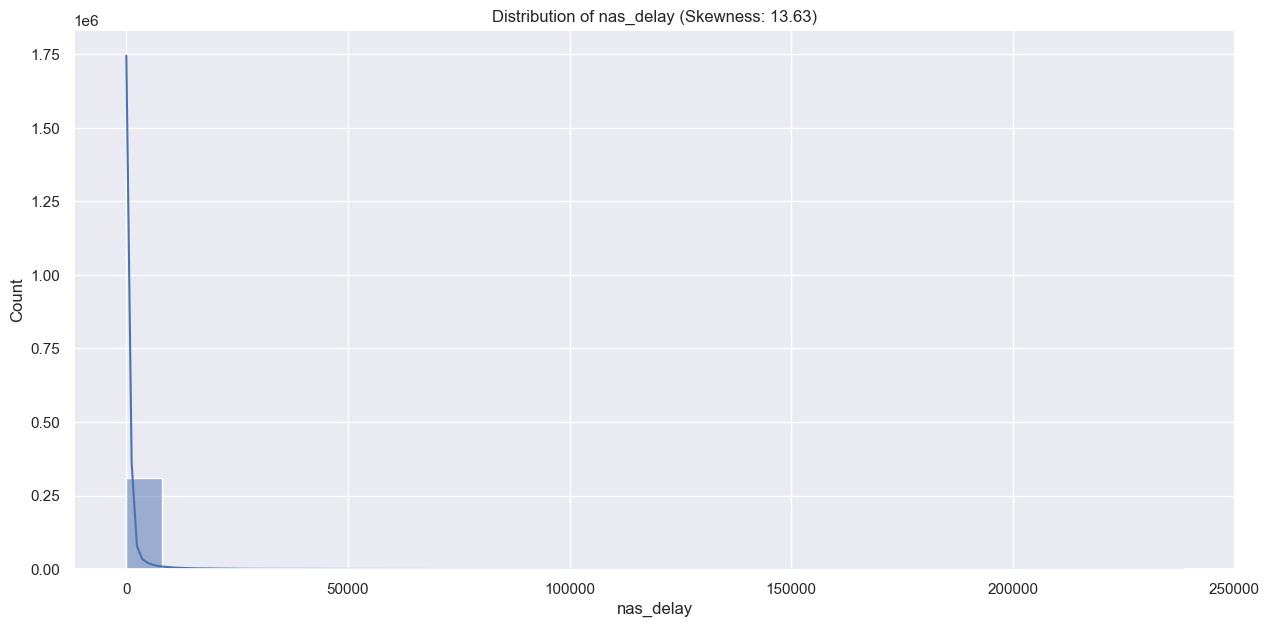

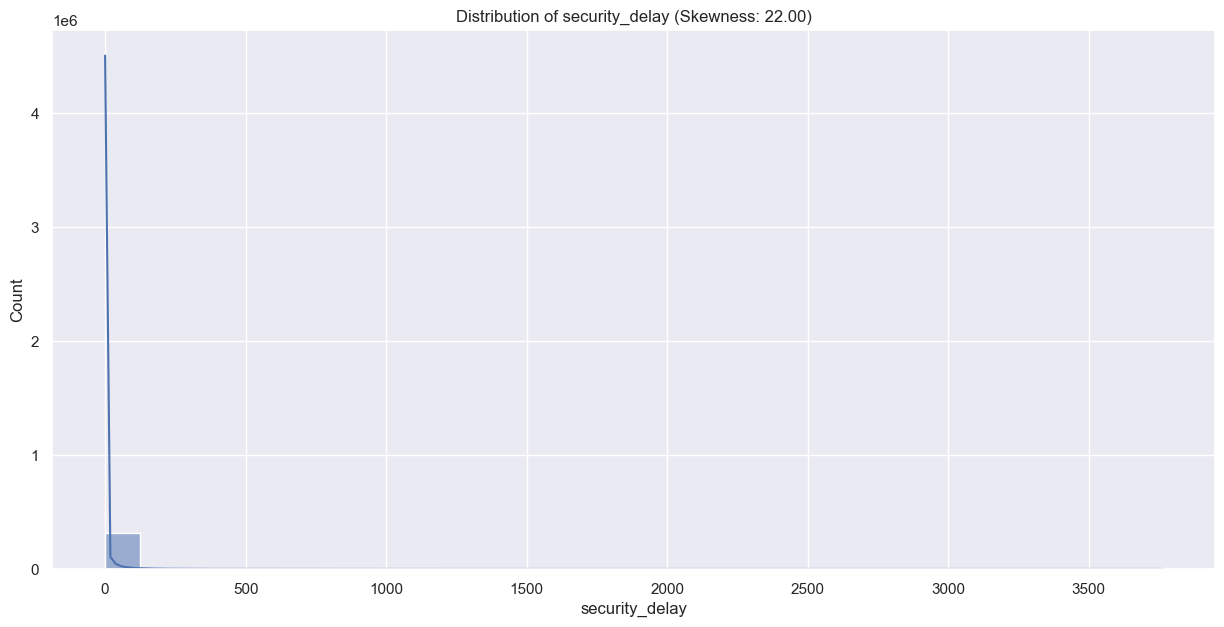

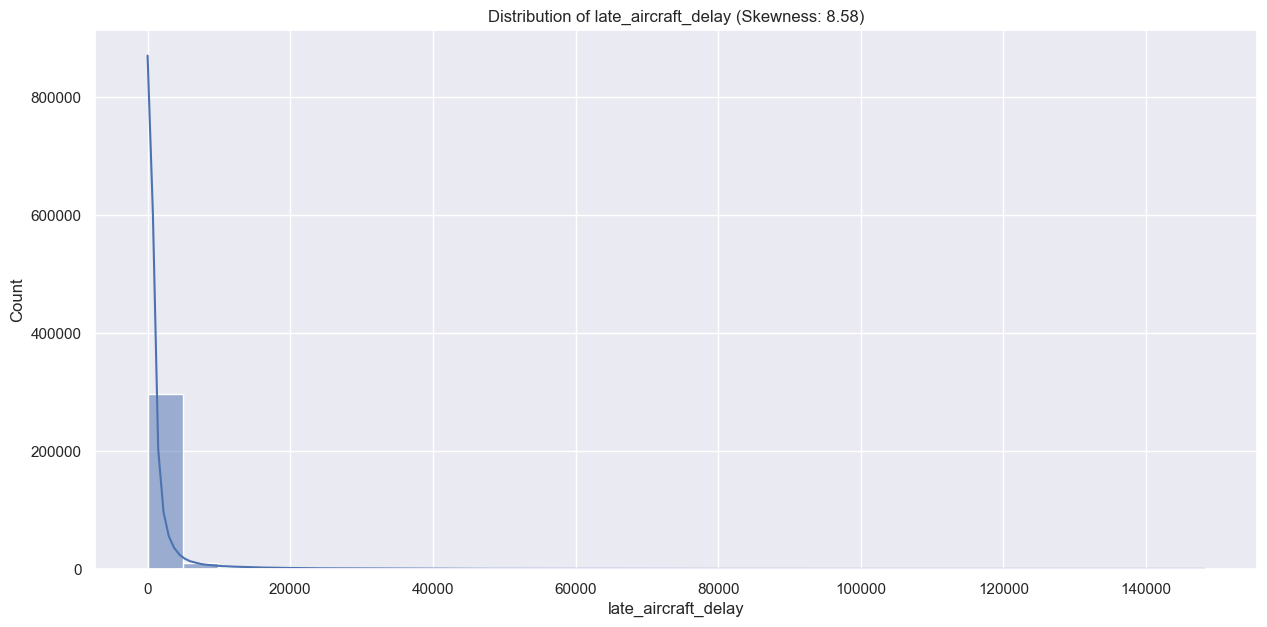

In [20]:
for col in numerical_cols:
    plt.figure(figsize=(15, 7))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} (Skewness: {df[col].skew():.2f})')
    plt.show()

##### Impute Missing Values in Numerical Columns Based on Skewness and Coefficient of Variation

In [21]:
for col in numerical_cols:
    if df[col].isnull().sum() > 0:  
        skewness = df[col].skew()
        mean_value = df[col].mean()
        std_dev = df[col].std()
        cv = std_dev / mean_value if mean_value != 0 else 0 
        
        if abs(skewness) > 1:  # Highly skewed data
            df[col] = df[col].fillna(df[col].median())
        elif 0.5 < abs(skewness) <= 1:  
            if cv > 1:  # High variance, likely skewed
                df[col] = df[col].fillna(df[col].median())
            else:  # Low variance, not strongly skewed
                df[col] = df[col].fillna(df[col].mean())
        else:  # Normal distribution
            df[col] = df[col].fillna(df[col].mean())

In [22]:
df[numerical_cols].isnull().sum()

year                   0
month                  0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

##### Calculate Skewness of Numerical Columns

In [23]:
df[numerical_cols].skew()

year                    0.060822
month                   0.000352
arr_flights             7.679853
arr_del15               8.179389
carrier_ct              8.001938
weather_ct             21.656091
nas_ct                 11.796504
security_ct            16.478577
late_aircraft_ct        7.716420
arr_cancelled          32.385424
arr_diverted           16.625140
arr_delay               9.129725
carrier_delay          10.638655
weather_delay          17.363929
nas_delay              13.637653
security_delay         22.020152
late_aircraft_delay     8.584226
dtype: float64

##### Detect outliers using IQR

In [24]:
def detect_outliers(df, cols):
    outlier_counts = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    return outlier_counts

detect_outliers(df, numerical_cols)

{'year': 0,
 'month': 0,
 'arr_flights': 35949,
 'arr_del15': 35104,
 'carrier_ct': 31788,
 'weather_ct': 36015,
 'nas_ct': 37465,
 'security_ct': 42004,
 'late_aircraft_ct': 37039,
 'arr_cancelled': 37969,
 'arr_diverted': 22261,
 'arr_delay': 35544,
 'carrier_delay': 32118,
 'weather_delay': 38770,
 'nas_delay': 38944,
 'security_delay': 42012,
 'late_aircraft_delay': 37108}

##### Visualize Numerical Column Outliers with Boxplots

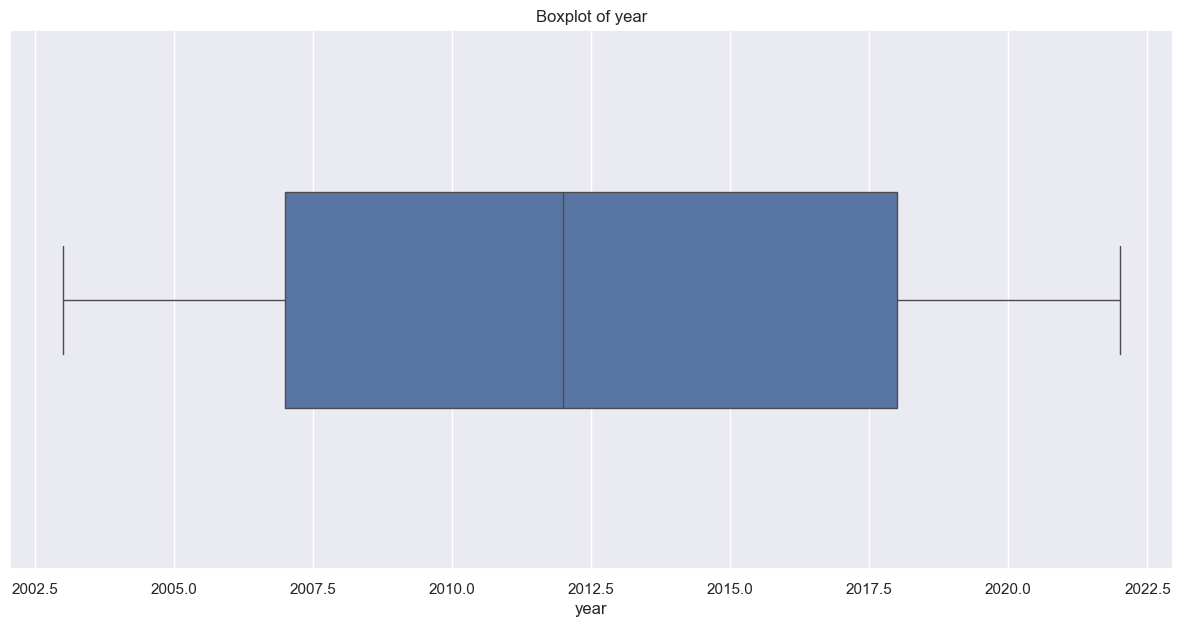

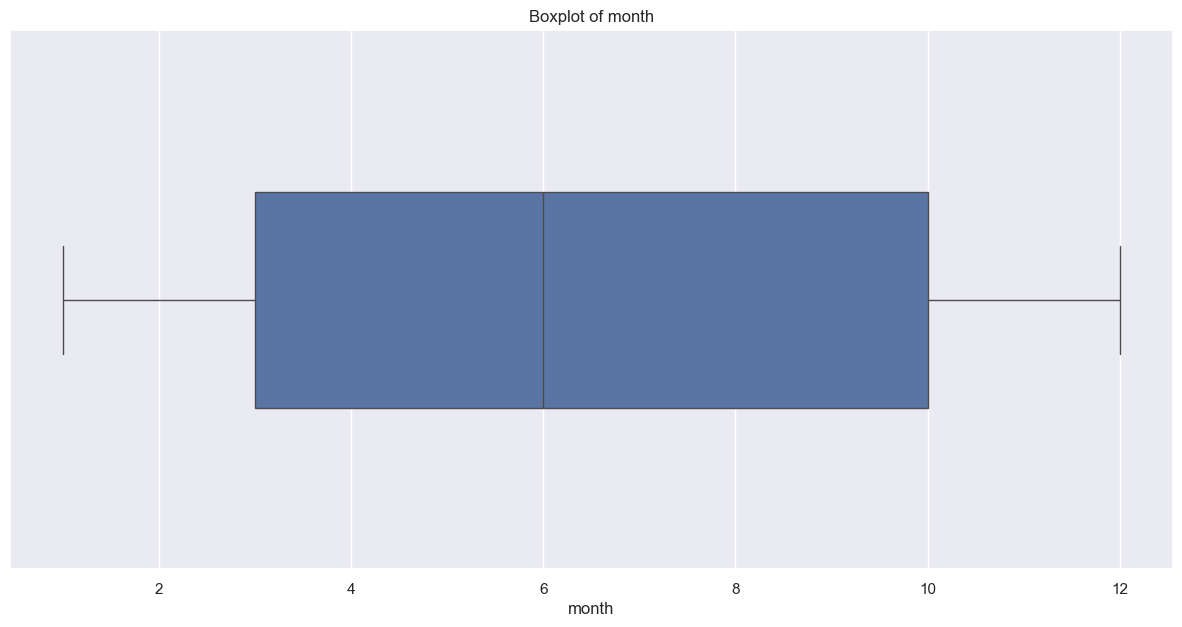

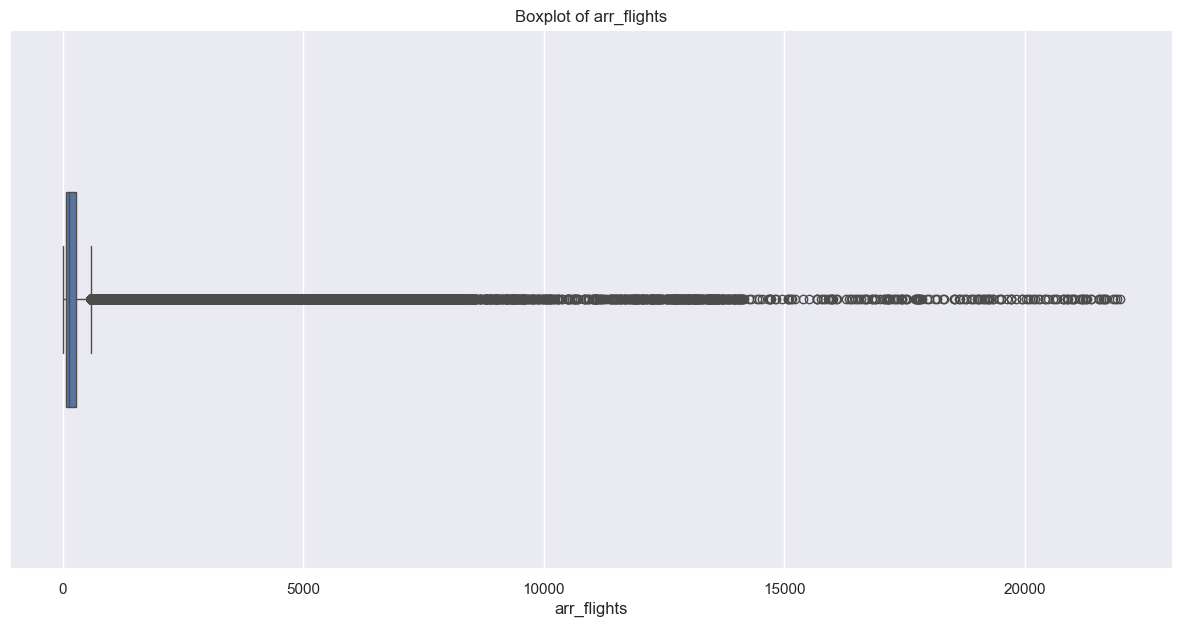

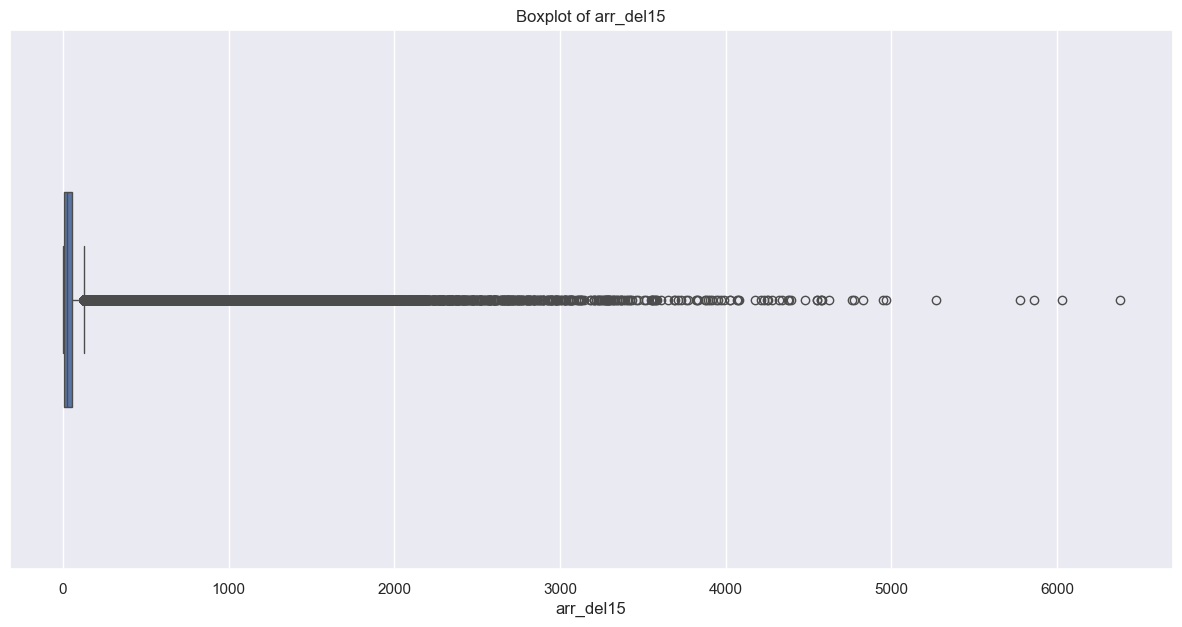

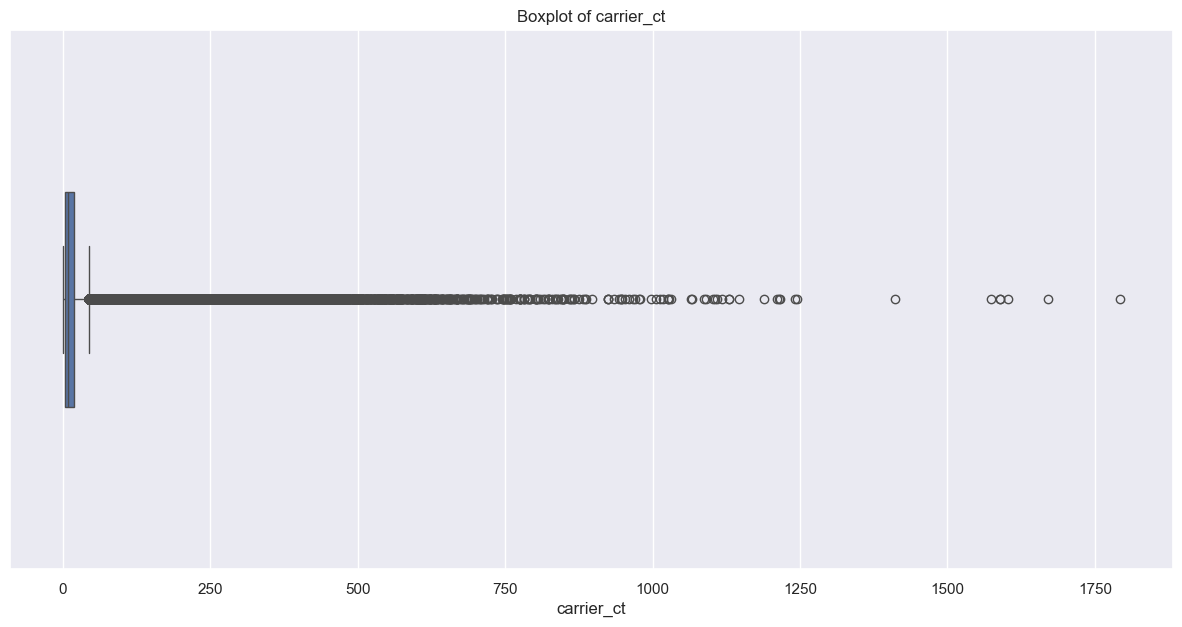

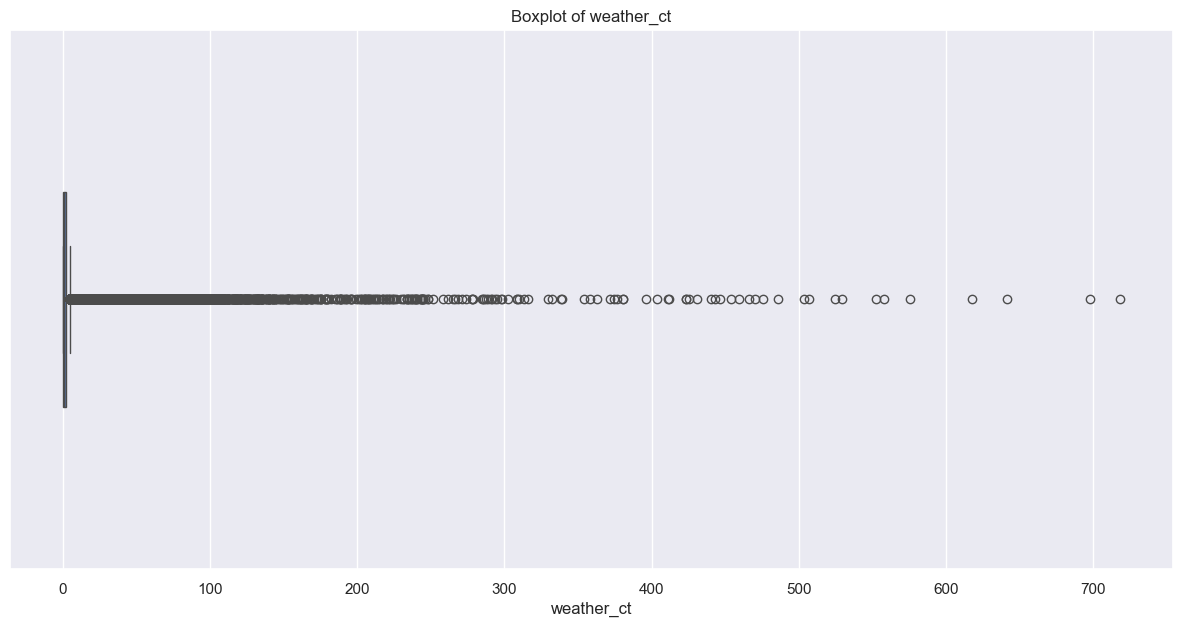

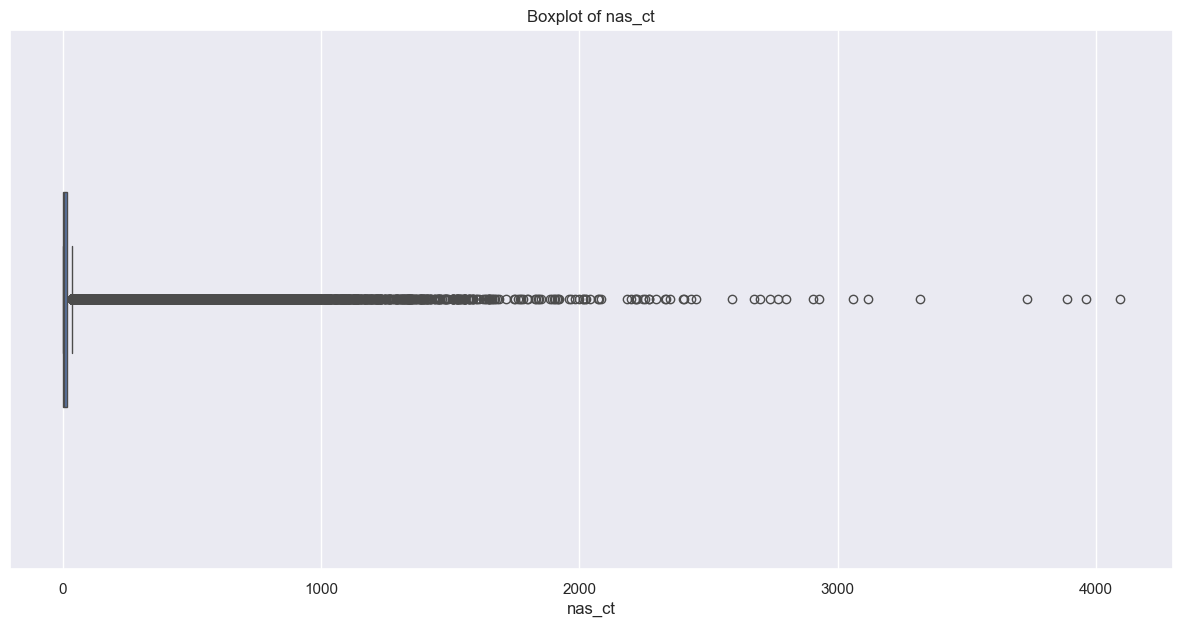

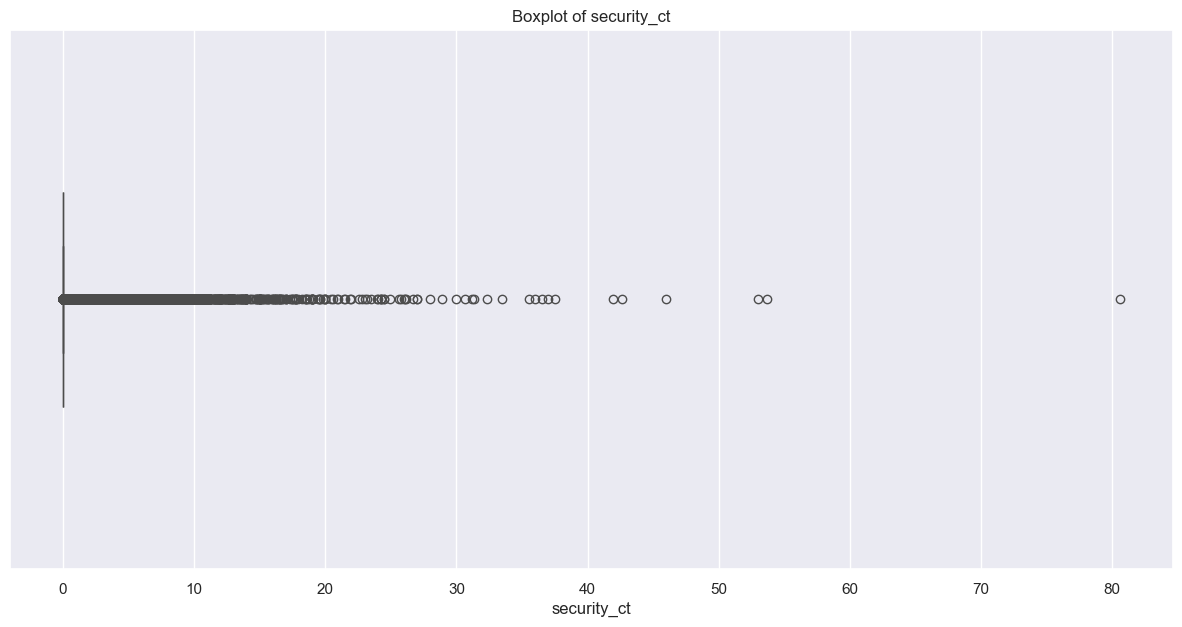

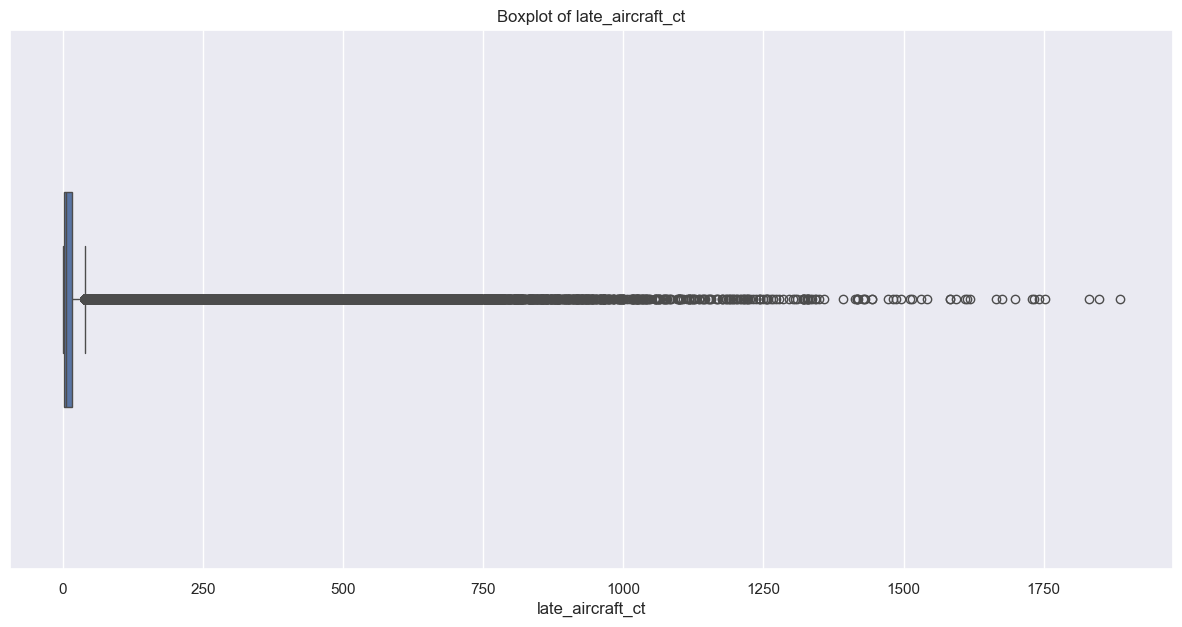

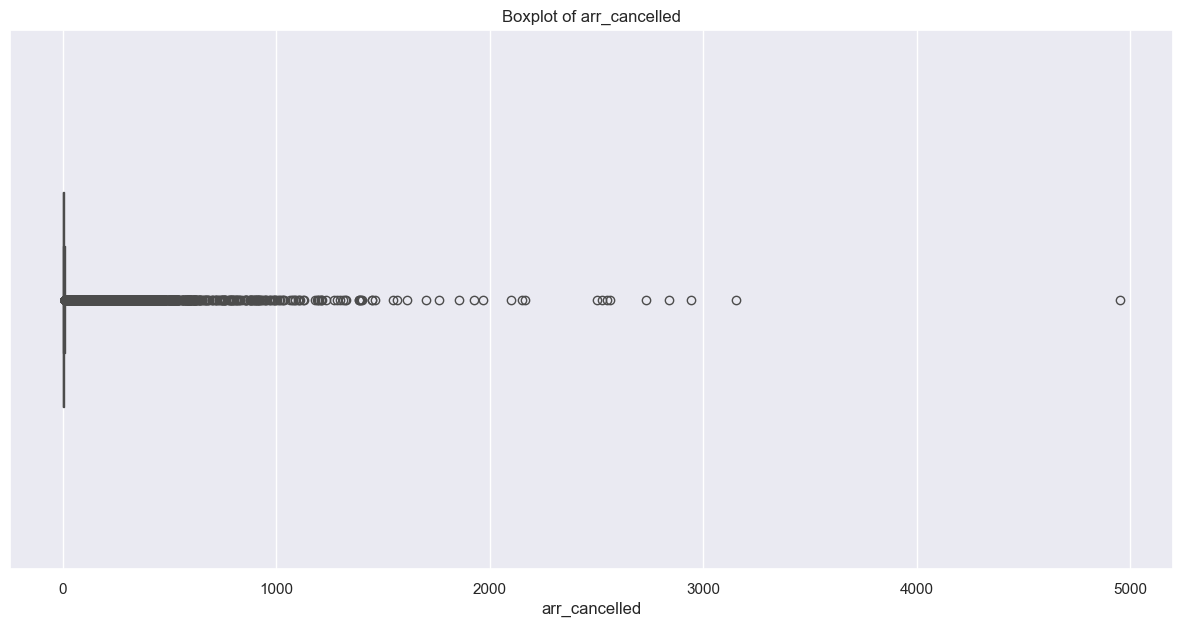

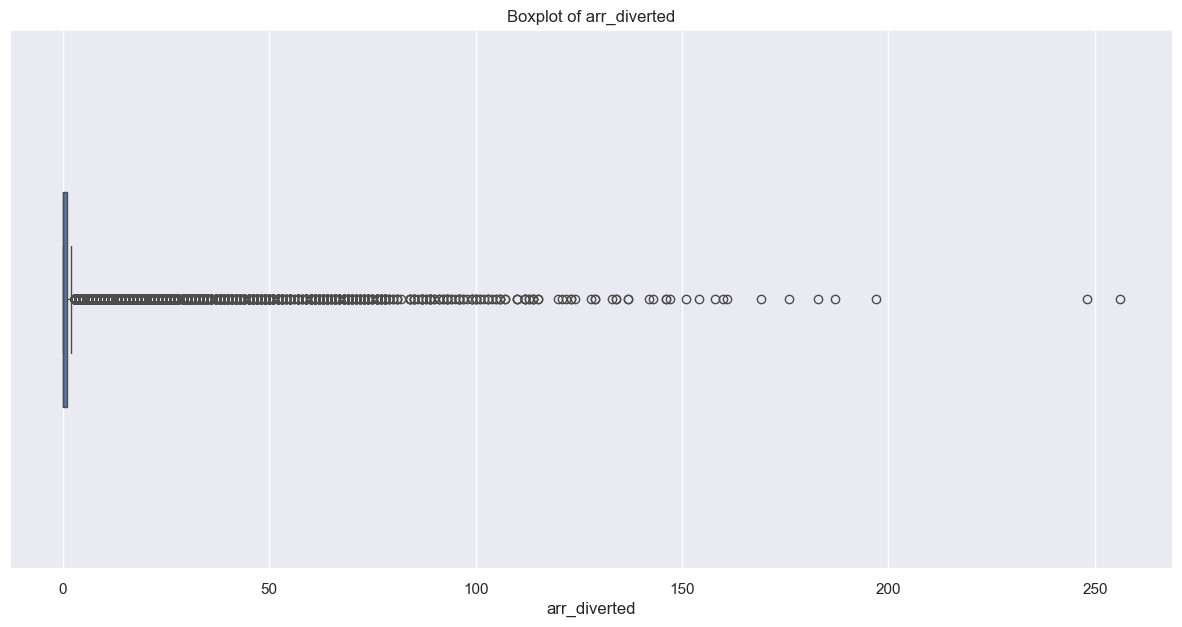

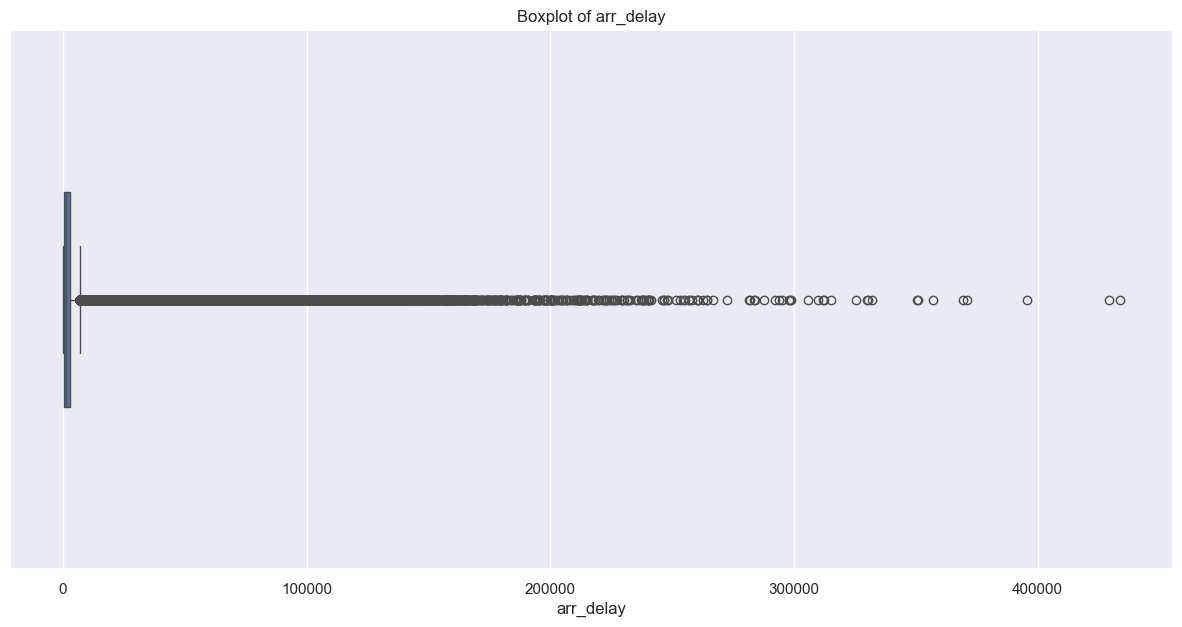

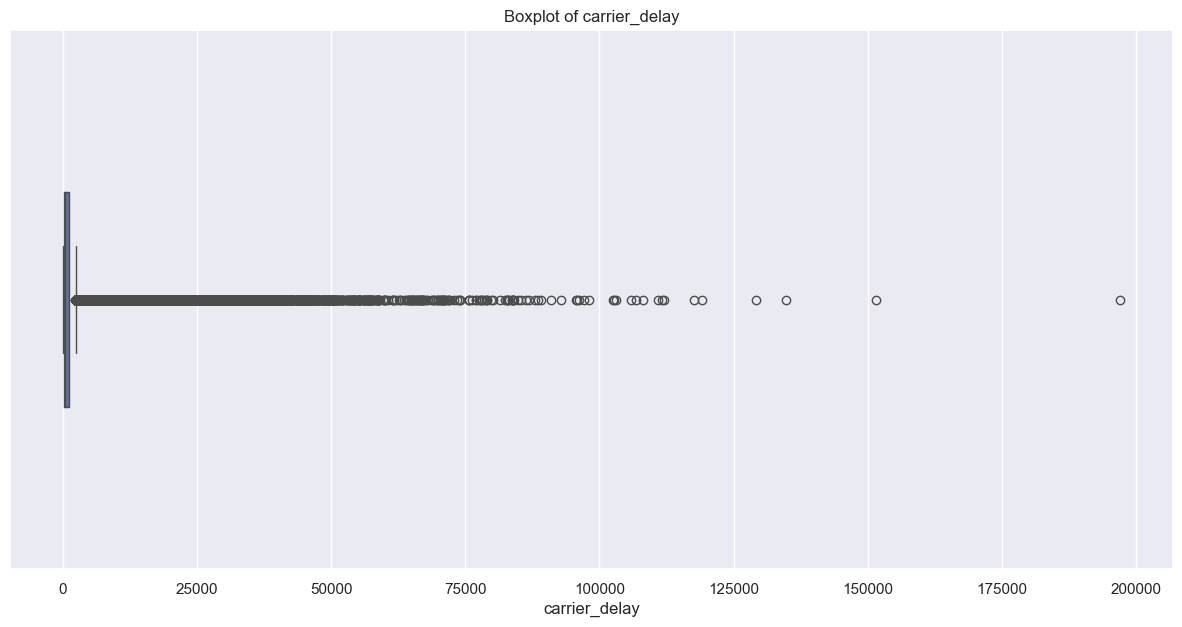

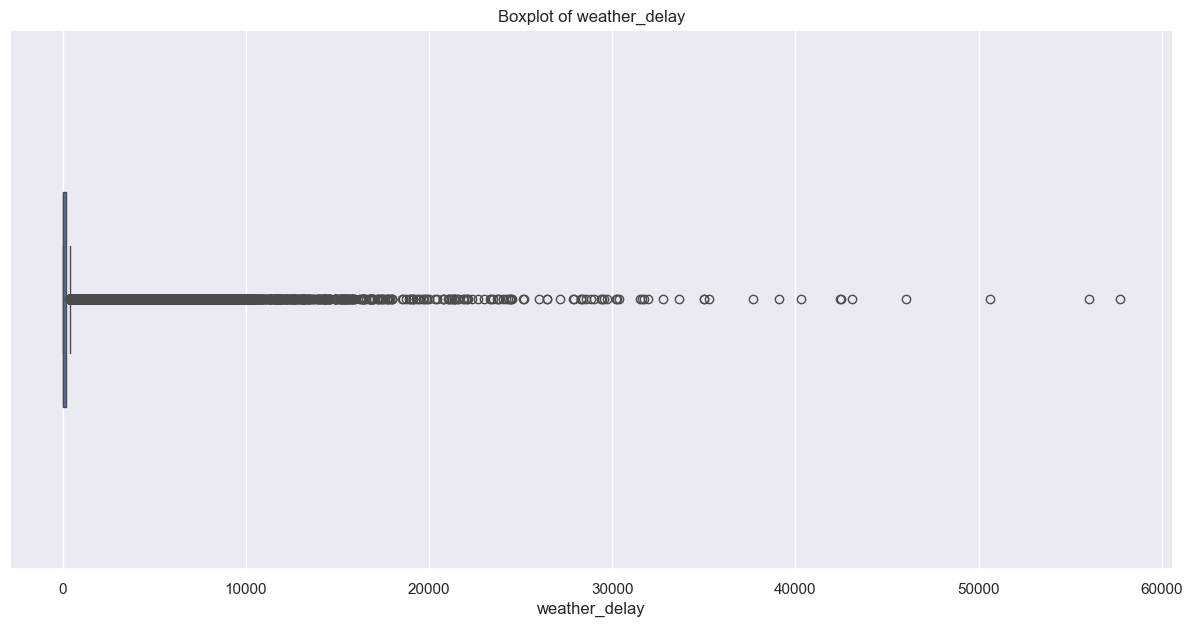

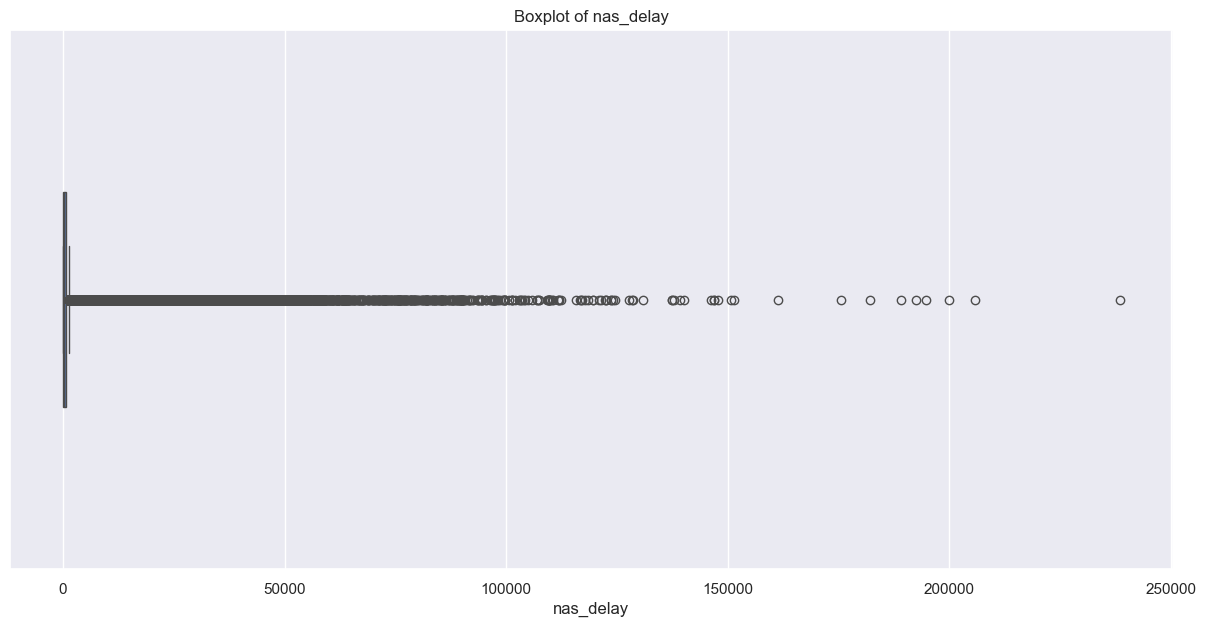

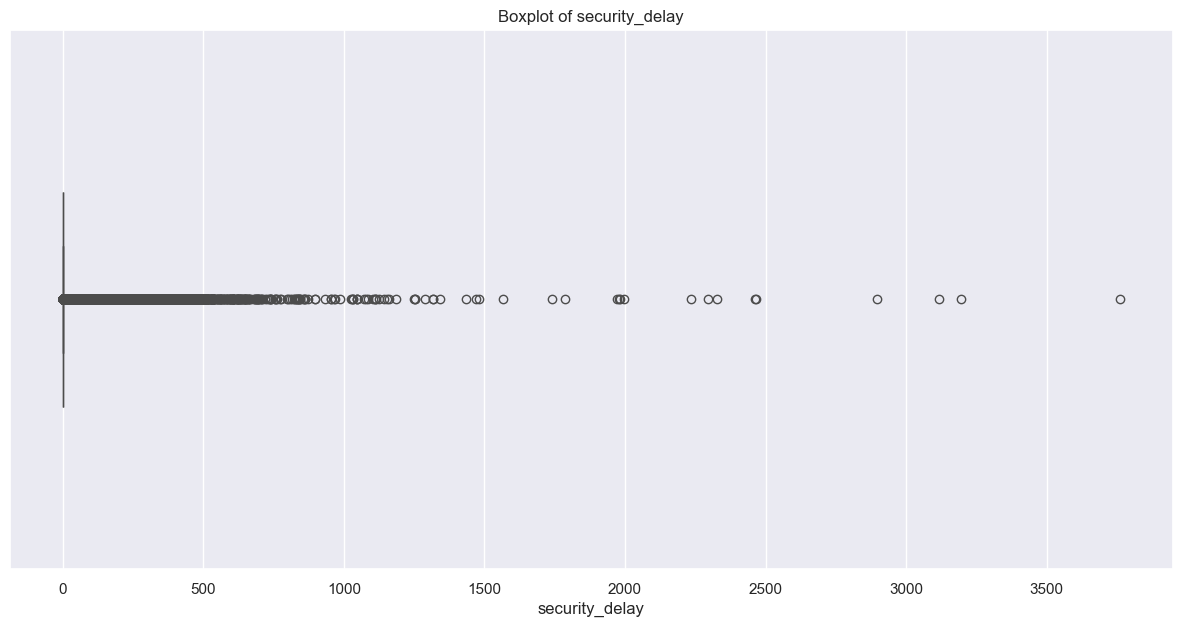

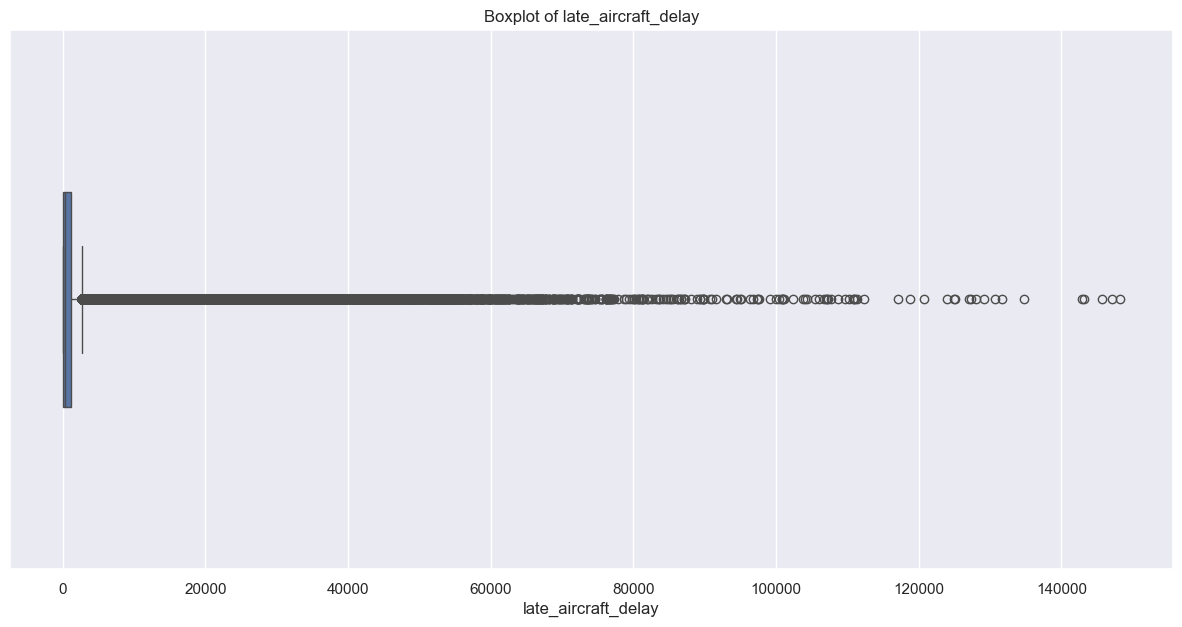

In [25]:
for col in numerical_cols:
    plt.figure(figsize=(15, 7))
    sns.boxplot(x = df[col], width=0.4)
    plt.title(f'Boxplot of {col}')
    plt.show()

##### Apply Yeo-Johnson Power Transformation to Numerical Columns

In [26]:
pt = PowerTransformer(method='yeo-johnson')  # Handles negative values
df[numerical_cols] = pt.fit_transform(df[numerical_cols])

In [27]:
df[numerical_cols].skew()

year                   0.000000
month                 -0.169006
arr_flights           -0.012890
arr_del15             -0.004059
carrier_ct             0.007988
weather_ct             0.354978
nas_ct                 0.045305
security_ct            2.248821
late_aircraft_ct       0.047495
arr_cancelled          0.277825
arr_diverted           1.026920
arr_delay              0.097161
carrier_delay          0.060078
weather_delay          0.059582
nas_delay             -0.259904
security_delay         2.176440
late_aircraft_delay   -0.018655
dtype: float64

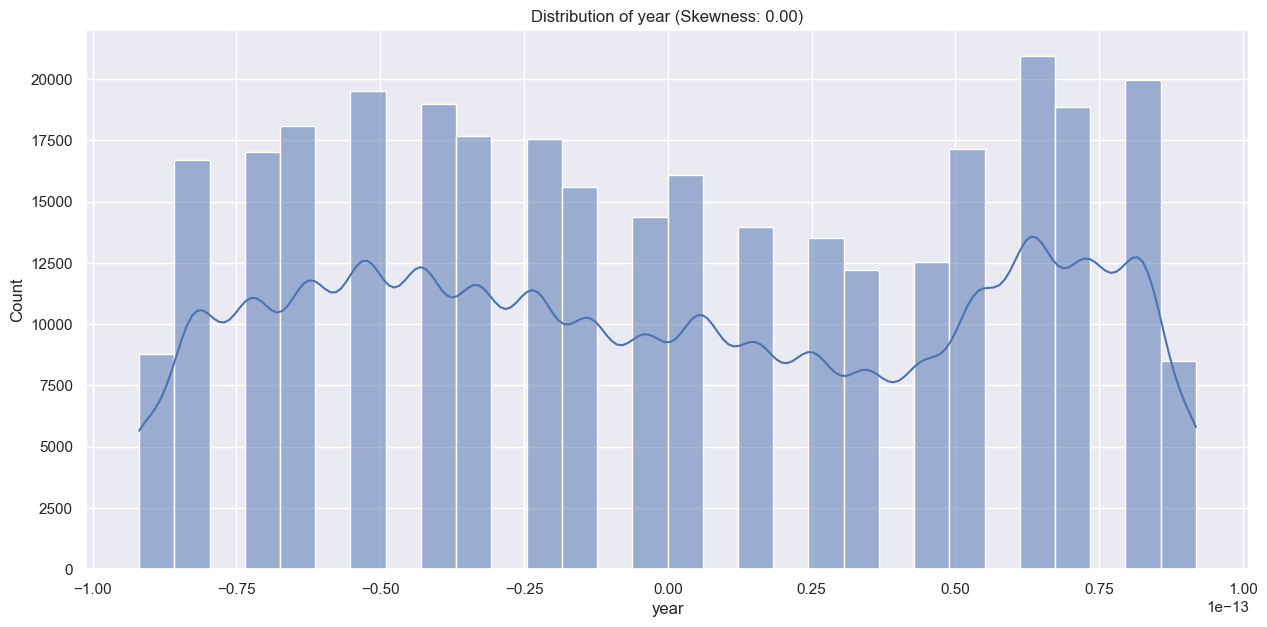

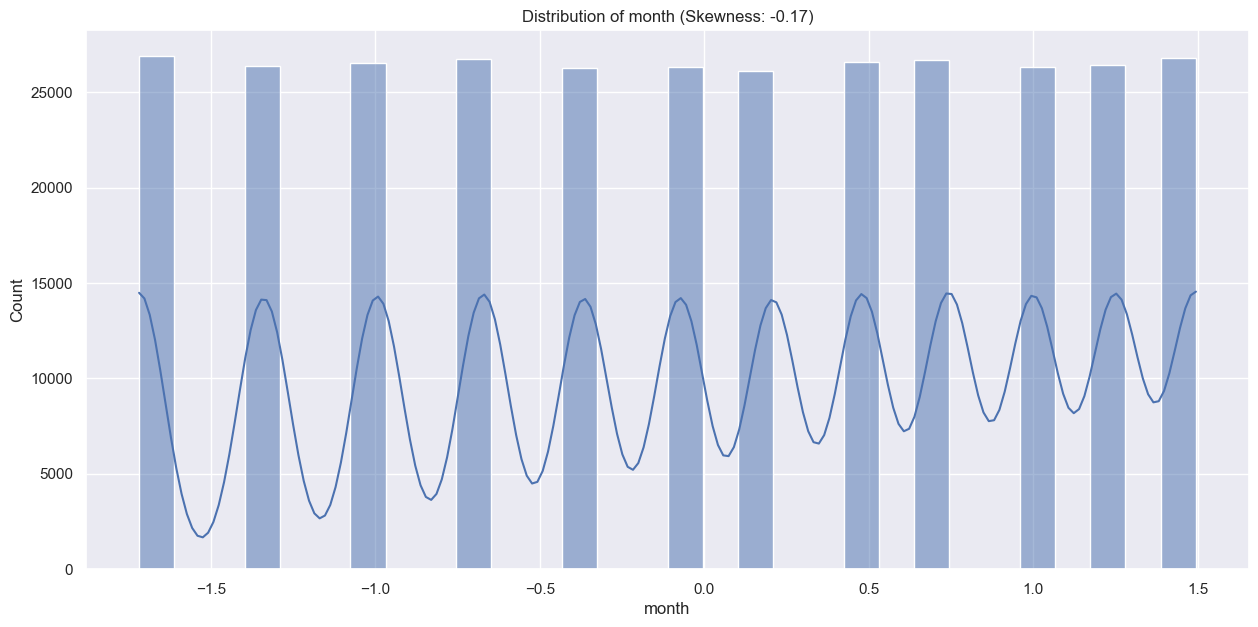

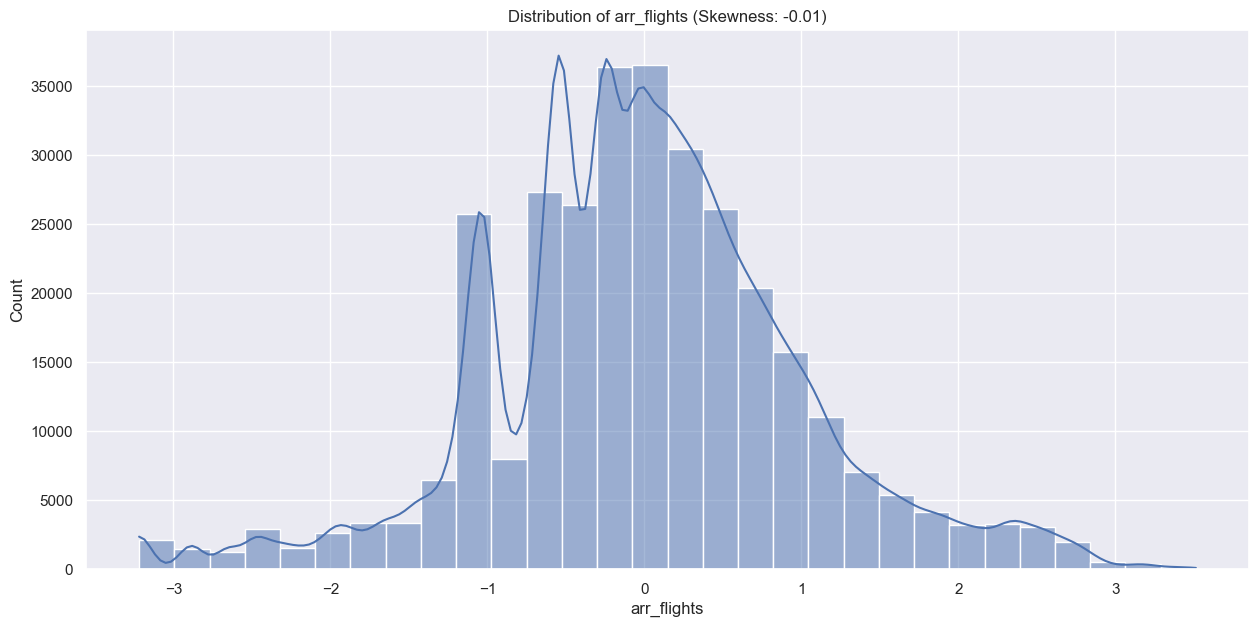

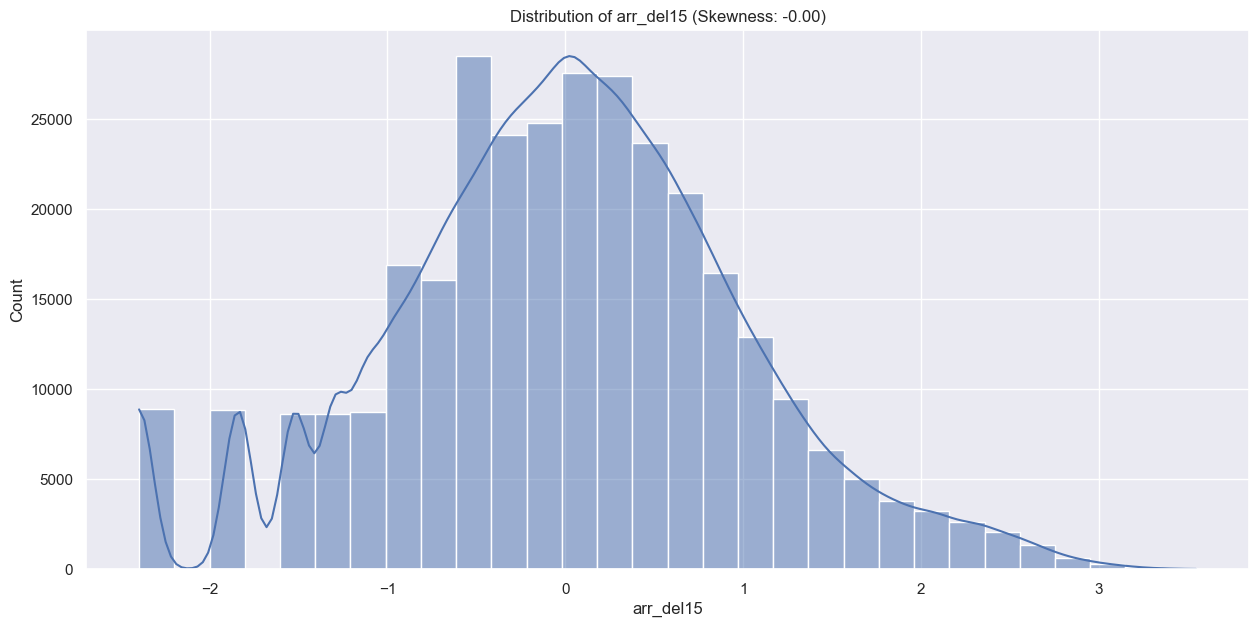

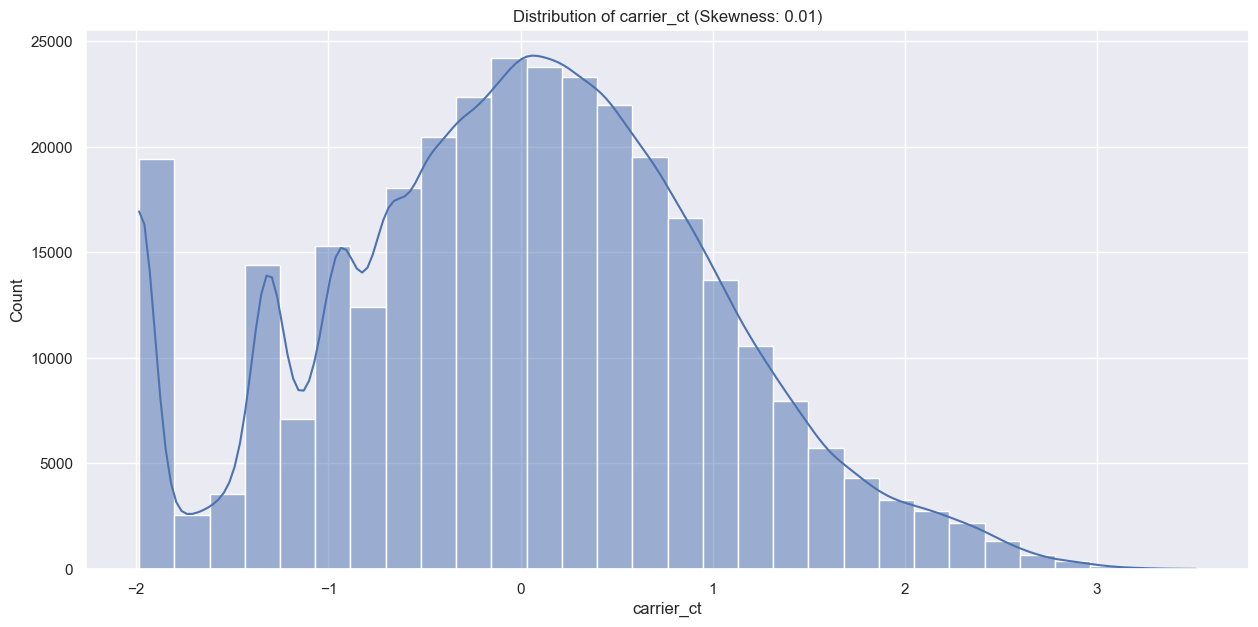

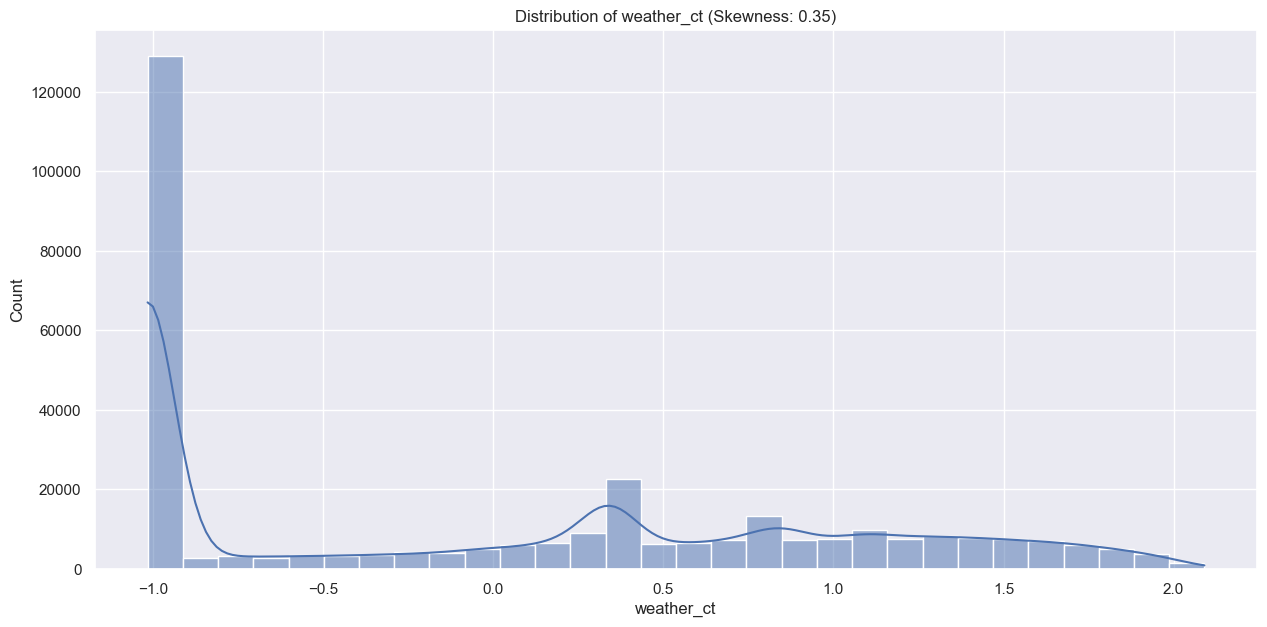

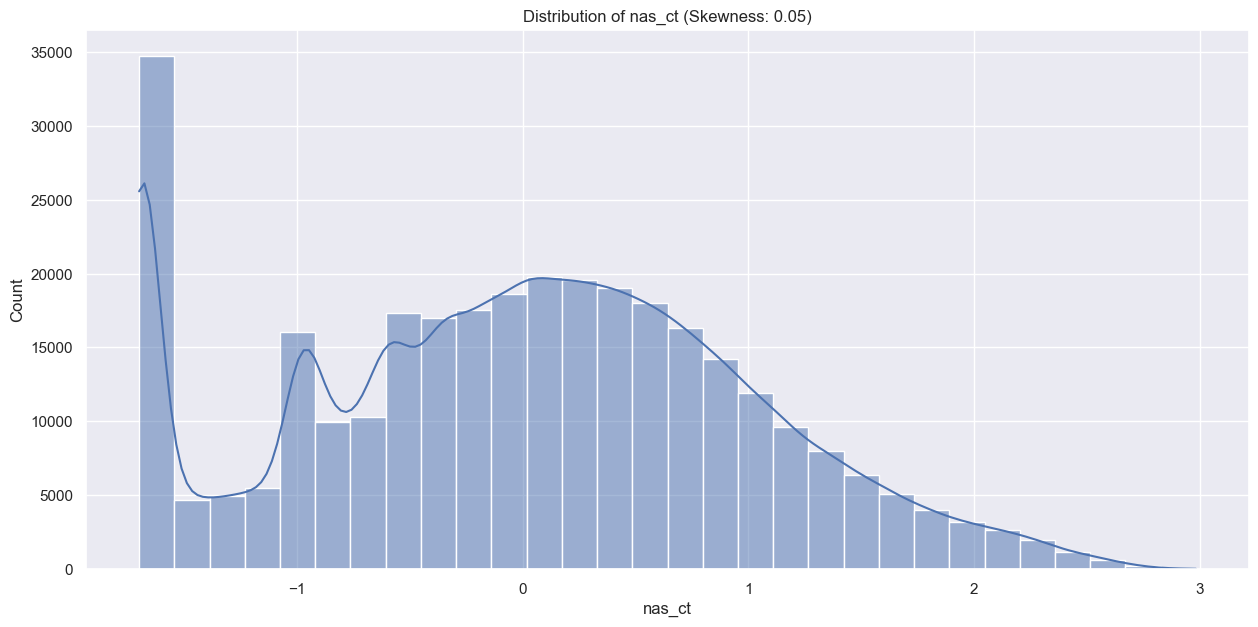

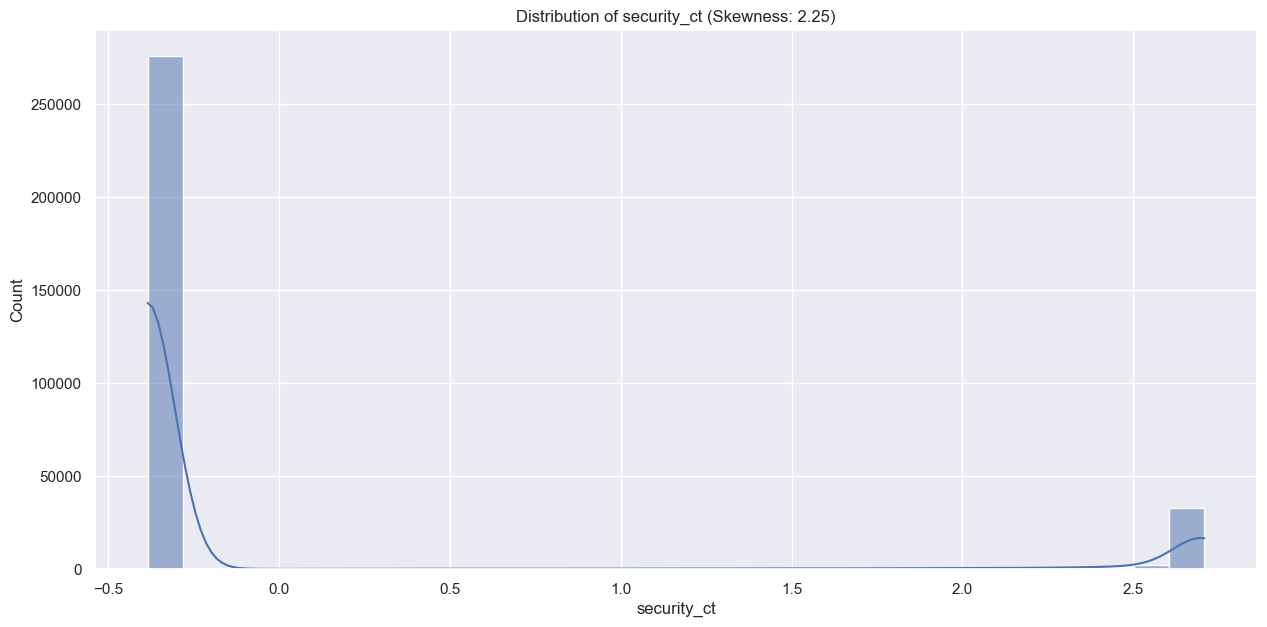

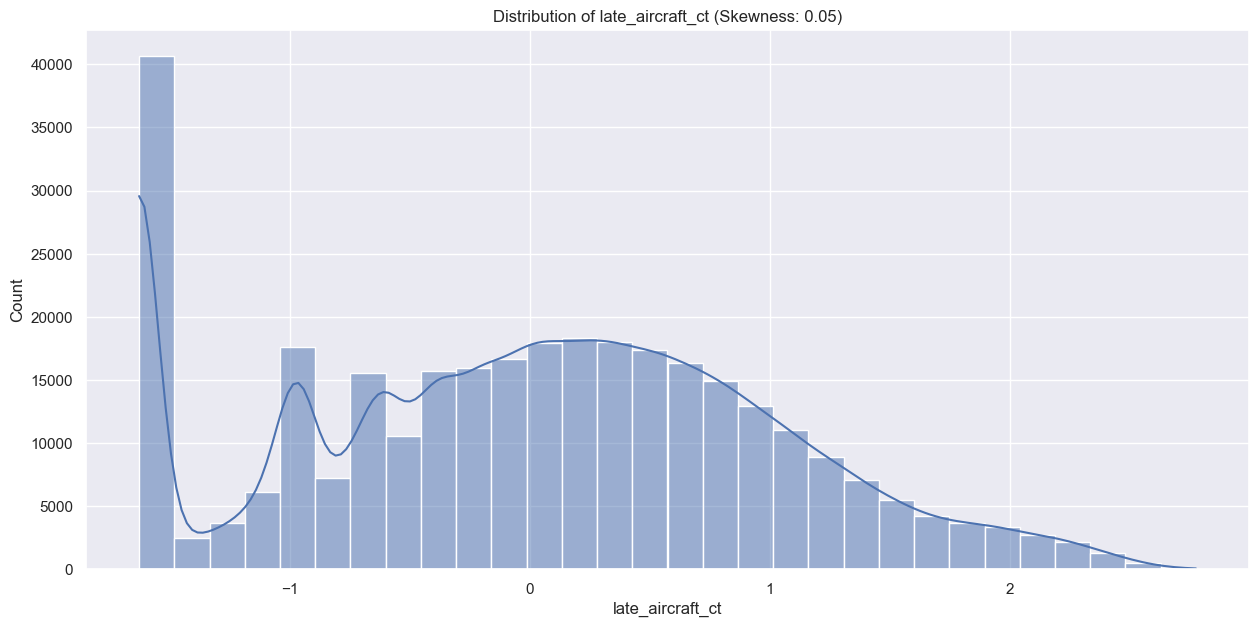

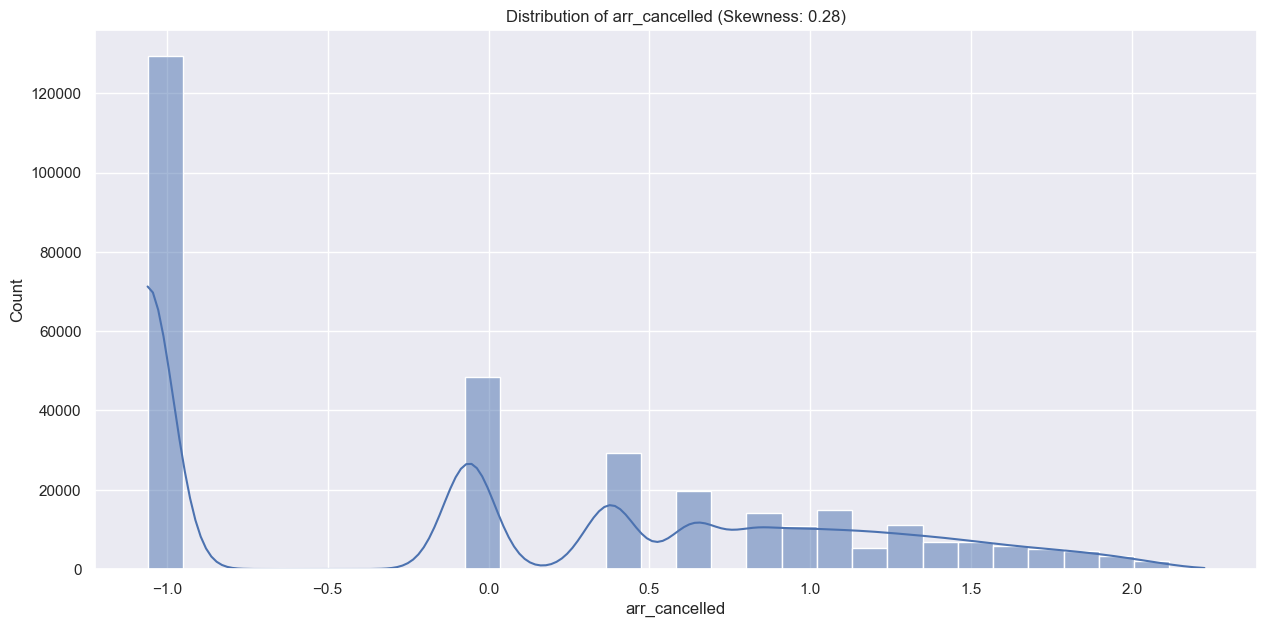

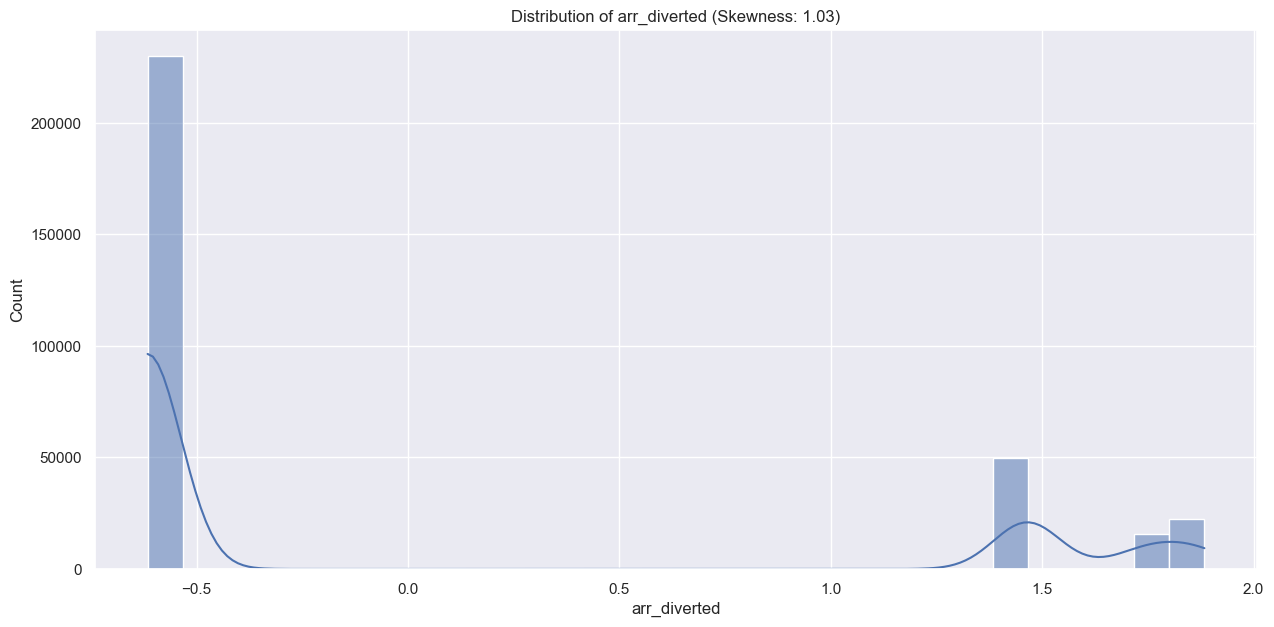

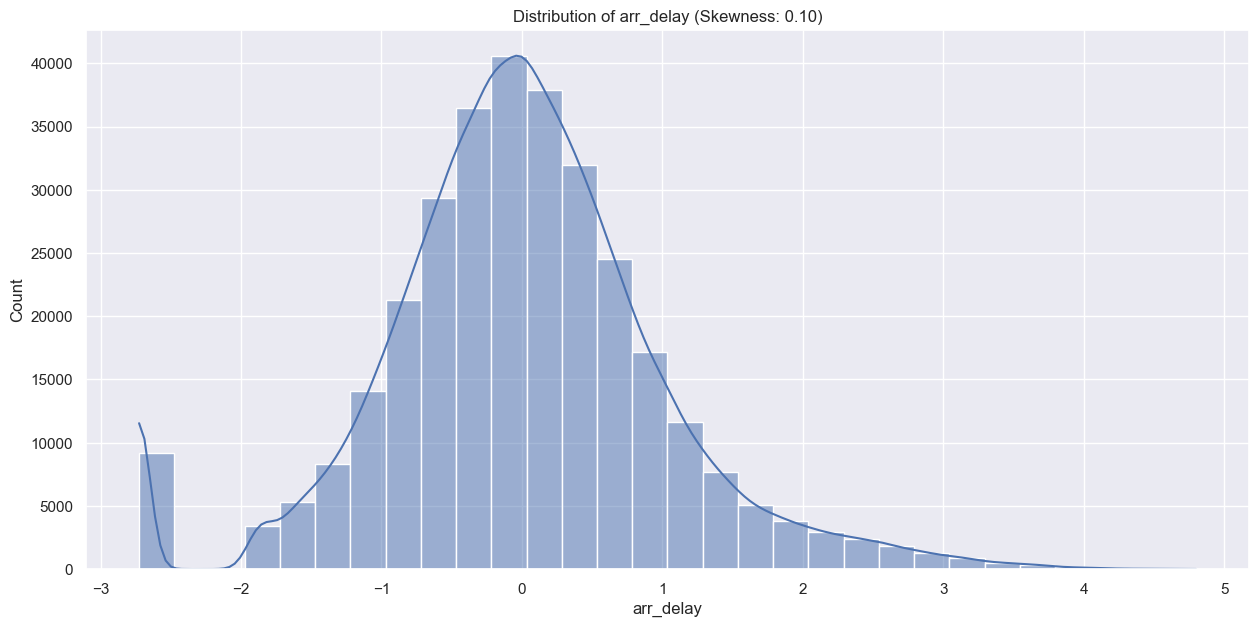

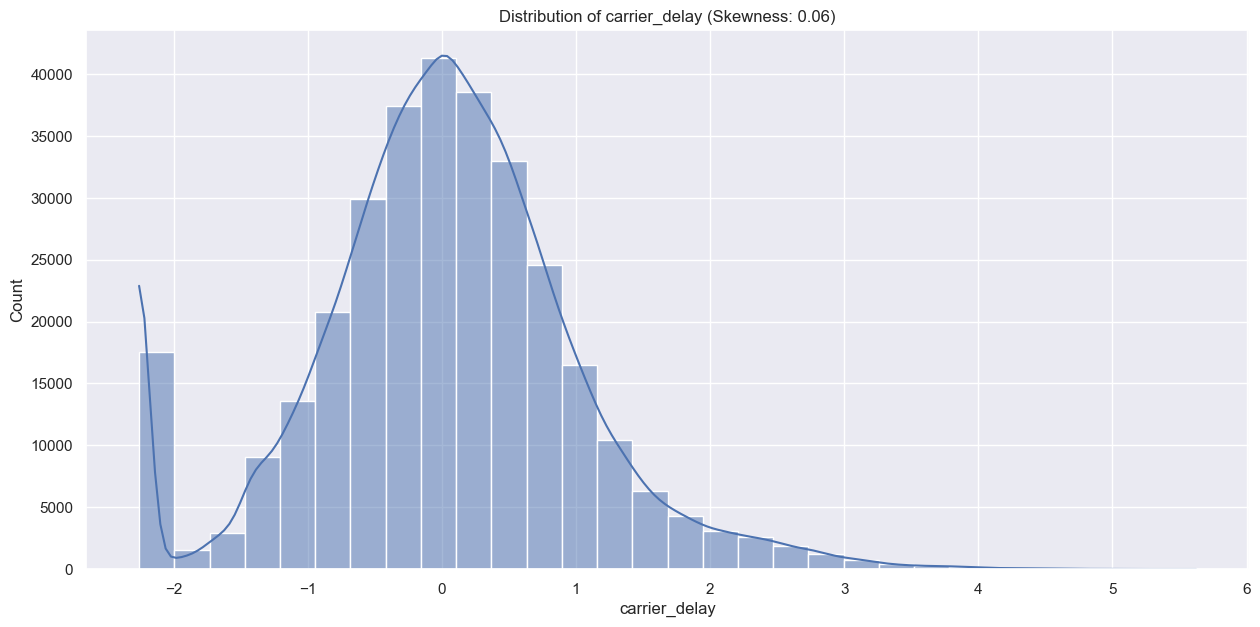

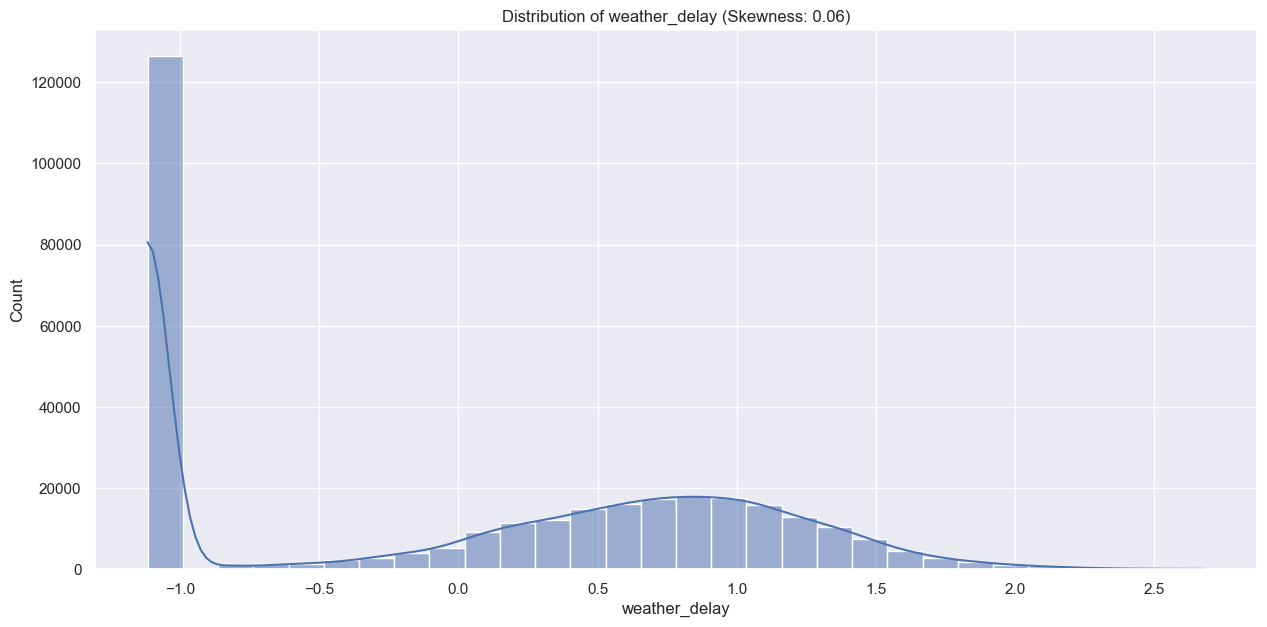

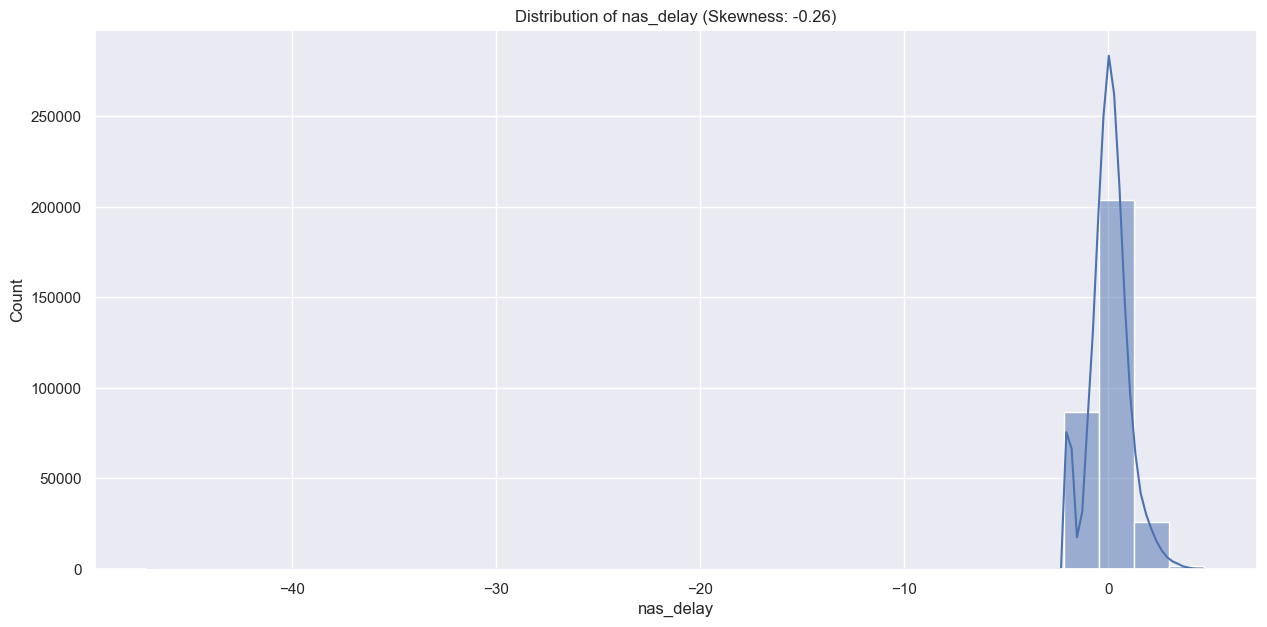

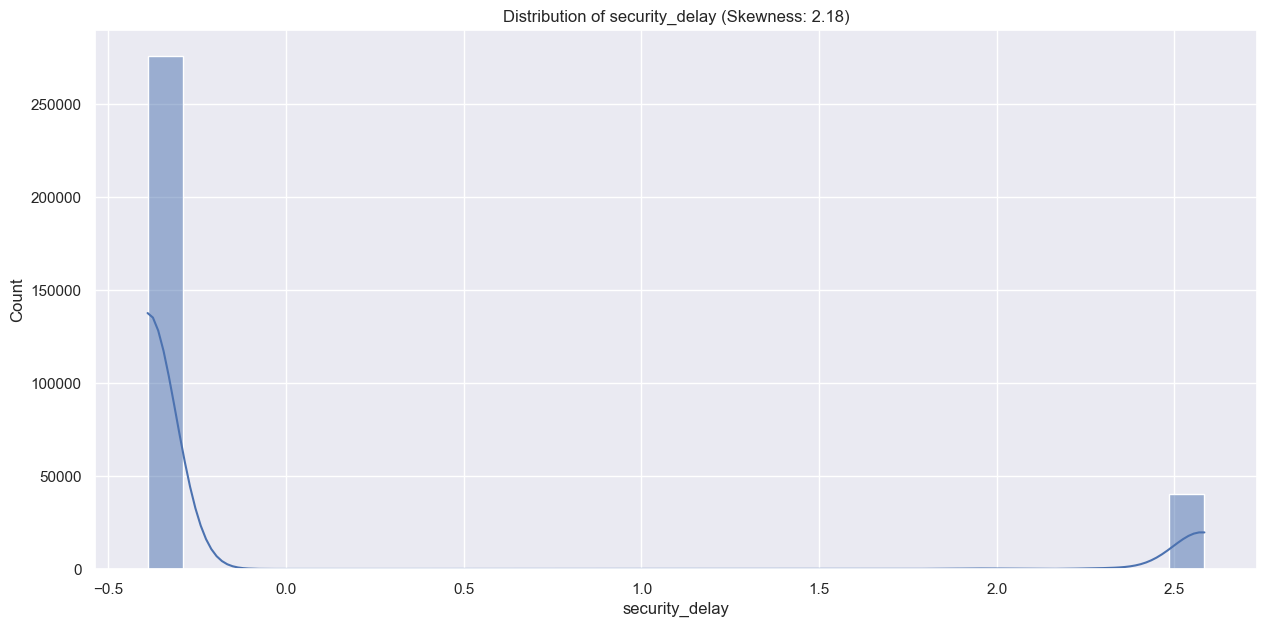

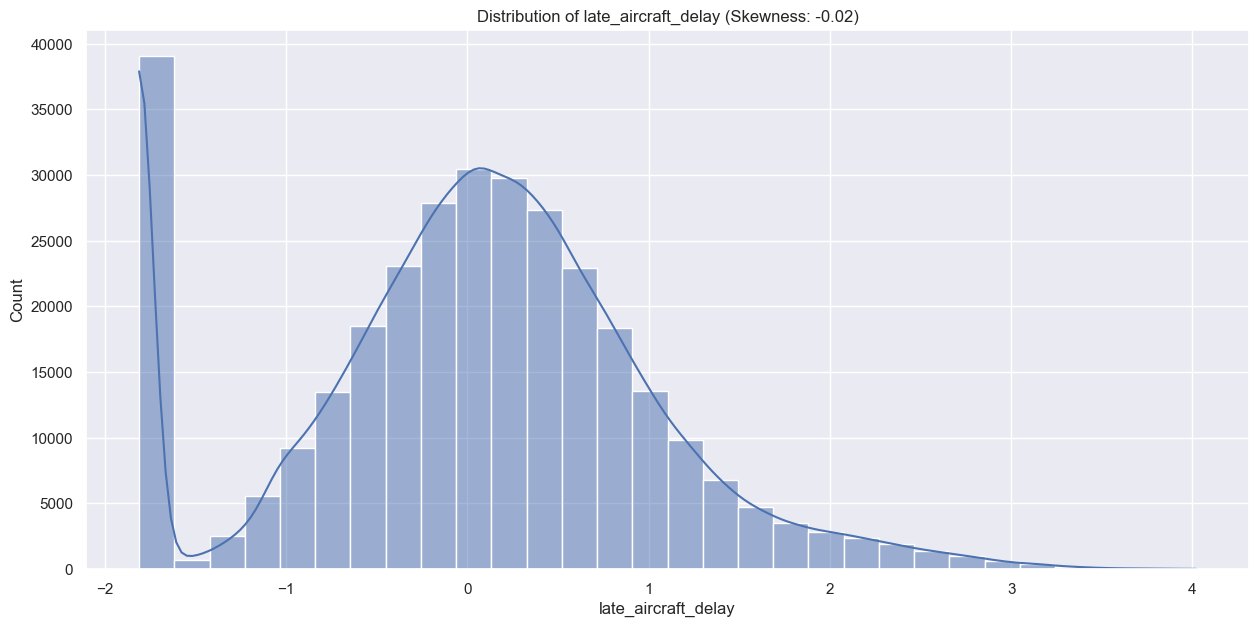

In [28]:
for col in numerical_cols:
    plt.figure(figsize=(15, 7))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} (Skewness: {df[col].skew():.2f})')
    plt.show()

##### Count Missing Values in Categorical Columns

In [29]:
df[categorical_cols].isnull().sum()

carrier         4
carrier_name    4
airport         3
airport_name    0
dtype: int64

In [30]:
df['airport'].mode()[0]

'DTW'

In [31]:
df['carrier_name'].mode()[0]

'SkyWest Airlines Inc.'

In [32]:
df['carrier'].mode()[0]

'OO'

In [33]:
df['carrier'].value_counts()

carrier
OO    38145
DL    27581
EV    26671
MQ    24402
AA    19781
UA    19131
WN    17576
YV    14528
AS    12942
F9    12306
OH    11999
9E    11998
B6    11585
US    10698
NW     8080
XE     7375
FL     6956
CO     6917
G4     6432
YX     4449
RU     4136
NK     3797
HA     3580
DH     1924
HP     1581
VX     1428
TZ      924
QX      838
AQ      253
Name: count, dtype: int64

In [34]:
df['carrier_name'].value_counts()

carrier_name
SkyWest Airlines Inc.           38145
Delta Air Lines Inc.            27581
ExpressJet Airlines Inc.        24542
American Airlines Inc.          19781
United Air Lines Inc.           19131
Southwest Airlines Co.          17576
American Eagle Airlines Inc.    15409
Mesa Airlines Inc.              14528
Alaska Airlines Inc.            12942
Frontier Airlines Inc.          12306
Atlantic Southeast Airlines     12204
JetBlue Airways                 11585
US Airways Inc.                 10698
Envoy Air                        8993
Northwest Airlines Inc.          8080
Comair Inc.                      7775
AirTran Airways Corporation      6956
Continental Air Lines Inc.       6917
Pinnacle Airlines Inc.           6454
Allegiant Air                    6432
Endeavor Air Inc.                5544
Republic Airline                 4449
PSA Airlines Inc.                4224
Spirit Air Lines                 3797
Hawaiian Airlines Inc.           3580
America West Airlines Inc.       1581

In [35]:
df['airport'].value_counts()

airport
DTW    3022
LAX    2990
LAS    2978
MCI    2967
PIT    2950
       ... 
TKI       1
ENV       1
SKA       1
CBM       1
YNG       1
Name: count, Length: 420, dtype: int64

In [36]:
df['carrier'] = df['carrier'].fillna(df['carrier'].mode()[0])
df['carrier_name'] = df['carrier_name'].fillna(df['carrier_name'].mode()[0])
df['airport'] = df['airport'].fillna(df['airport'].mode()[0])

In [37]:
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

##### Check for Duplicate Columns

In [38]:
df.T.duplicated()

year                   False
month                  False
carrier                False
carrier_name           False
airport                False
airport_name           False
arr_flights            False
arr_del15              False
carrier_ct             False
weather_ct             False
nas_ct                 False
security_ct            False
late_aircraft_ct       False
arr_cancelled          False
arr_diverted           False
arr_delay              False
carrier_delay          False
weather_delay          False
nas_delay              False
security_delay         False
late_aircraft_delay    False
dtype: bool

#### Encoding Categorical Features

In [39]:
df[categorical_cols].describe()

,carrier,carrier_name,airport,airport_name
count,318017,318017,318017,318017
unique,29,33,420,420
top,OO,SkyWest Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,38149,38149,3025,3022


##### OHE coding for small catogories

In [40]:
df = pd.get_dummies(df, columns=['carrier', 'carrier_name'], drop_first=True)

##### Label Encoding to high-cardinality features for embedding

In [41]:
high_cardinality_cols = ['airport', 'airport_name']

for col in high_cardinality_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 79 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   year                                       318017 non-null  float64
 1   month                                      318017 non-null  float64
 2   airport                                    318017 non-null  int32  
 3   airport_name                               318017 non-null  int32  
 4   arr_flights                                318017 non-null  float64
 5   arr_del15                                  318017 non-null  float64
 6   carrier_ct                                 318017 non-null  float64
 7   weather_ct                                 318017 non-null  float64
 8   nas_ct                                     318017 non-null  float64
 9   security_ct                                318017 non-null  float64
 10  late_air

#### Cyclic Encoding of Time Features

##### Convert year and month into cyclic features (sin/cos transformation)

In [43]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df = df.drop(columns=['month'])

In [44]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'bool']
numerical_cols

['year',
 'airport',
 'airport_name',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'month_sin',
 'month_cos']

#### Define Target

In [45]:
df['arr_flights']

0         0.061732
1        -0.230652
2        -1.382583
3        -0.255145
4         0.268259
            ...   
318012    0.962367
318013    0.998029
318014    0.113117
318015   -0.199242
318016    2.314912
Name: arr_flights, Length: 318017, dtype: float64

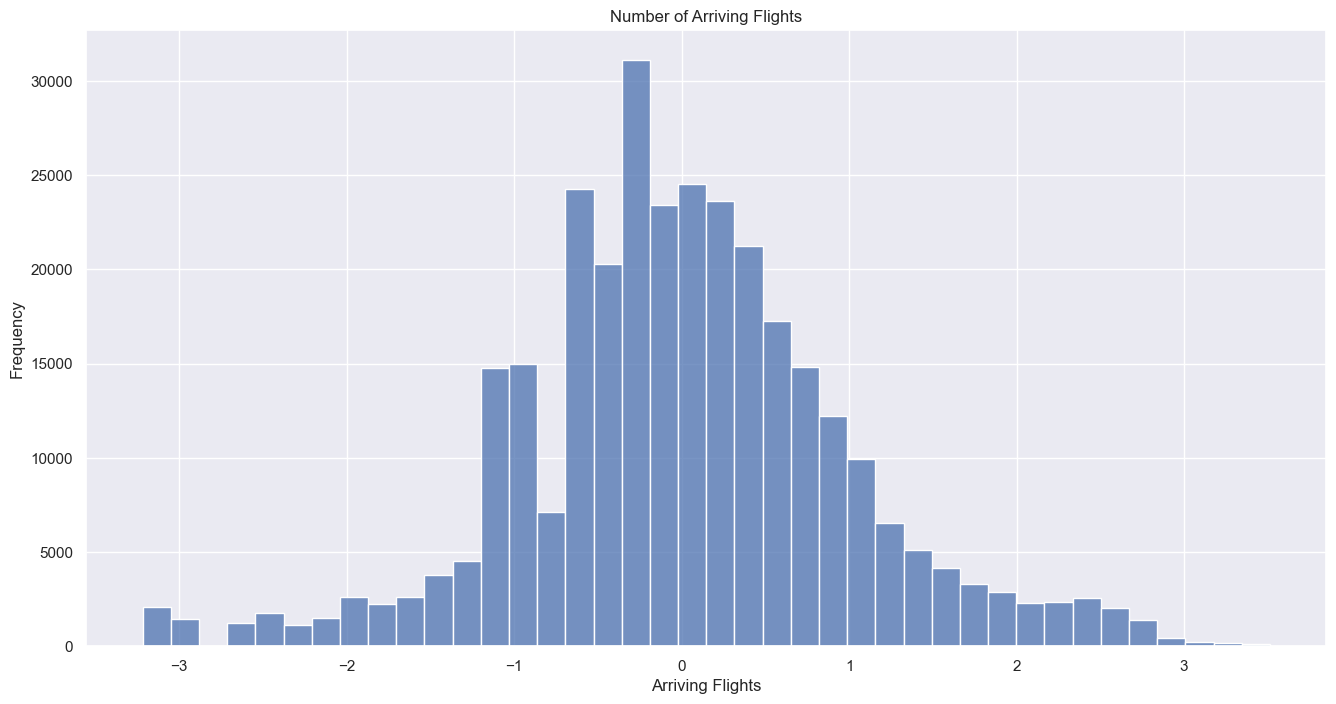

In [46]:
plt.figure(figsize=(16, 8))
sns.histplot(df['arr_flights'], bins=40)
plt.title('Number of Arriving Flights')
plt.ylabel('Frequency')
plt.xlabel('Arriving Flights')

plt.show()

#### Scaling

In [47]:
numerical_cols

['year',
 'airport',
 'airport_name',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'month_sin',
 'month_cos']

In [48]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#### Split the data into training and testing sets

In [49]:
X = df.drop(['arr_flights'], axis=1)
y = df['arr_flights']

In [50]:
X

,year,airport,airport_name,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_name_Pinnacle Airlines Inc.,carrier_name_Republic Airline,carrier_name_SkyWest Airlines Inc.,carrier_name_Southwest Airlines Co.,carrier_name_Spirit Air Lines,carrier_name_US Airways Inc.,carrier_name_United Air Lines Inc.,carrier_name_Virgin America,month_sin,month_cos
0,1.671295,-1.804675,-1.658002,-0.774469,-0.206890,-1.014988,-1.635462,-0.384935,-0.964974,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
1,1.671295,-1.770666,-1.691653,-0.221966,-0.050452,-1.014988,-0.459884,-0.384935,0.068923,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
2,1.671295,-1.762164,0.436795,-1.521136,-1.863999,-1.014988,-0.980062,-0.384935,-1.021159,-0.060280,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
3,1.671295,-1.711150,-1.666415,-0.312455,-0.062422,0.150386,-0.115802,-0.384935,-0.719691,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
4,1.671295,-1.702647,-1.565461,-0.105203,0.412060,-1.014988,-0.340751,-0.384935,-0.585456,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,-1.675080,1.196645,1.219189,0.898662,0.864022,1.131705,1.161104,-0.384935,0.837783,-1.059605,...,False,False,False,False,False,False,False,False,-0.088002,1.106177
318013,-1.675080,1.213649,1.092997,1.082959,0.744288,0.924981,1.567010,-0.384935,0.551142,0.638760,...,False,False,False,False,False,False,False,False,-0.088002,1.106177
318014,-1.675080,1.273165,1.101409,0.329361,-0.090059,-1.014988,1.028527,-0.384935,-0.569287,-1.059605,...,False,False,False,False,False,False,False,False,-0.088002,1.106177
318015,-1.675080,1.290170,1.109822,-0.362547,-0.549651,-1.014988,0.275978,-0.384935,-0.795382,-1.059605,...,False,False,False,False,False,False,False,False,-0.088002,1.106177


In [51]:
y

0         0.061732
1        -0.230652
2        -1.382583
3        -0.255145
4         0.268259
            ...   
318012    0.962367
318013    0.998029
318014    0.113117
318015   -0.199242
318016    2.314912
Name: arr_flights, Length: 318017, dtype: float64

In [52]:
X.head(10)

,year,airport,airport_name,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_name_Pinnacle Airlines Inc.,carrier_name_Republic Airline,carrier_name_SkyWest Airlines Inc.,carrier_name_Southwest Airlines Co.,carrier_name_Spirit Air Lines,carrier_name_US Airways Inc.,carrier_name_United Air Lines Inc.,carrier_name_Virgin America,month_sin,month_cos
0,1.671295,-1.804675,-1.658002,-0.774469,-0.206890,-1.014988,-1.635462,-0.384935,-0.964974,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
1,1.671295,-1.770666,-1.691653,-0.221966,-0.050452,-1.014988,-0.459884,-0.384935,0.068923,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
2,1.671295,-1.762164,0.436795,-1.521136,-1.863999,-1.014988,-0.980062,-0.384935,-1.021159,-0.060280,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
3,1.671295,-1.711150,-1.666415,-0.312455,-0.062422,0.150386,-0.115802,-0.384935,-0.719691,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
4,1.671295,-1.702647,-1.565461,-0.105203,0.412060,-1.014988,-0.340751,-0.384935,-0.585456,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
5,1.671295,-1.685643,-1.683241,-0.141966,-0.418714,0.346496,0.145119,-0.384935,0.068923,0.945743,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
6,1.671295,-1.600620,-1.582287,1.984638,2.041767,1.763348,1.743708,-0.384935,1.947259,0.378573,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
7,1.671295,-1.592117,-1.624351,-0.362547,-0.356121,-1.014988,0.181420,-0.384935,-0.832478,-1.059605,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
8,1.671295,-1.575113,-1.557048,-0.686934,-0.299502,0.346496,-1.034589,-0.384935,-1.021159,-0.060280,...,False,False,False,False,False,False,False,False,-0.403436,0.957708
9,1.671295,-1.566610,-1.607525,-0.312455,-0.399876,-1.014988,0.250022,-0.384935,-0.653985,-0.060280,...,False,False,False,False,False,False,False,False,-0.403436,0.957708


In [53]:
X = X.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

In [54]:
X.head(10)

,year,airport,airport_name,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_name_Pinnacle Airlines Inc.,carrier_name_Republic Airline,carrier_name_SkyWest Airlines Inc.,carrier_name_Southwest Airlines Co.,carrier_name_Spirit Air Lines,carrier_name_US Airways Inc.,carrier_name_United Air Lines Inc.,carrier_name_Virgin America,month_sin,month_cos
0,1.671295,-1.804675,-1.658002,-0.774469,-0.206890,-1.014988,-1.635462,-0.384935,-0.964974,-1.059605,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
1,1.671295,-1.770666,-1.691653,-0.221966,-0.050452,-1.014988,-0.459884,-0.384935,0.068923,-1.059605,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
2,1.671295,-1.762164,0.436795,-1.521136,-1.863999,-1.014988,-0.980062,-0.384935,-1.021159,-0.060280,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
3,1.671295,-1.711150,-1.666415,-0.312455,-0.062422,0.150386,-0.115802,-0.384935,-0.719691,-1.059605,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
4,1.671295,-1.702647,-1.565461,-0.105203,0.412060,-1.014988,-0.340751,-0.384935,-0.585456,-1.059605,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
5,1.671295,-1.685643,-1.683241,-0.141966,-0.418714,0.346496,0.145119,-0.384935,0.068923,0.945743,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
6,1.671295,-1.600620,-1.582287,1.984638,2.041767,1.763348,1.743708,-0.384935,1.947259,0.378573,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
7,1.671295,-1.592117,-1.624351,-0.362547,-0.356121,-1.014988,0.181420,-0.384935,-0.832478,-1.059605,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
8,1.671295,-1.575113,-1.557048,-0.686934,-0.299502,0.346496,-1.034589,-0.384935,-1.021159,-0.060280,...,0,0,0,0,0,0,0,0,-0.403436,0.957708
9,1.671295,-1.566610,-1.607525,-0.312455,-0.399876,-1.014988,0.250022,-0.384935,-0.653985,-0.060280,...,0,0,0,0,0,0,0,0,-0.403436,0.957708


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle=True)

print('X_train shape is: ', X_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_train shape is: ', y_train.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (238512, 79)
X_test shape is:  (79505, 79)
y_train shape is:  (238512,)
y_test shape is:  (79505,)


### Neural Network Training

In [56]:
kerasModel = keras.models.Sequential([
    # keras.layers.Input(shape=(79))  Optional (Same number of input features)
    keras.layers.Dense(8, activation='tanh'),
    # keras.layers.Dropout(0.1), #after training to solve the overfitting
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='tanh'),
    # keras.layers.Dropout(0.3),
     keras.layers.Dense(32, activation='tanh'),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='linear')  # One layer for binary classiffication (sigmoid) or [two layers with (softmax) and requires OHE for the target]
                                                # One layer for regression (linear) or ((relu) => used in non negative ex. age
])

In [57]:
MyOptimizer = AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name='AdamW'
)

In [58]:
kerasModel.compile(optimizer='adam', loss='mse', metrics=['mse'])  # Regression (mse)

In [59]:
model = kerasModel.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    epochs = 2000,
    batch_size = 50,
    verbose = 1,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        patience=10,
        monitor='val_loss',
        restore_best_weights = True
    )]
  )

Epoch 1/2000
4771/4771 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.2146 - mse: 0.2146 - val_loss: 0.1336 - val_mse: 0.1336
Epoch 2/2000
4771/4771 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1412 - mse: 0.1412 - val_loss: 0.1314 - val_mse: 0.1314
Epoch 3/2000
4771/4771 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.1366 - mse: 0.1366 - val_loss: 0.1294 - val_mse: 0.1294
Epoch 4/2000
4771/4771 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1322 - mse: 0.1322 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 5/2000
4771/4771 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1321 - mse: 0.1321 - val_loss: 0.1257 - val_mse: 0.1257
Epoch 6/2000
4771/4771 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1273 - mse: 0.1273 - val_loss: 0.1252 - val_mse: 0.1252
Epoch 7/2000
4771/4771 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1288 - mse: 0.1288 - val_loss: 0.1235 - val_mse: 0.1235
Epoch 8/2000
4771/4771 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.1262 - mse: 0.1262 - val_loss: 0.1220 - val_mse: 0.1220
Epoch 9/2000
477

In [60]:
print(kerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,629 (541.52 KB)

 Trainable params: 46,209 (180.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,420 (361.02 KB)

None


#### Save Model

In [61]:
# kerasModel.save('kerasModel.model')

In [62]:
# NewKerasModel = keras.models.load_model('kerasModel.model')

#### Model Evaluation

In [63]:
X_test

,year,airport,airport_name,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,carrier_name_Pinnacle Airlines Inc.,carrier_name_Republic Airline,carrier_name_SkyWest Airlines Inc.,carrier_name_Southwest Airlines Co.,carrier_name_Spirit Air Lines,carrier_name_US Airways Inc.,carrier_name_United Air Lines Inc.,carrier_name_Virgin America,month_sin,month_cos
309125,-1.496135,-1.005457,-1.153232,2.036035,1.686744,1.837941,1.820569,-0.384935,2.085091,2.041286,...,0,0,0,0,0,0,0,0,-1.635131,-2.088130
6503,1.671295,1.477221,1.395859,-0.416521,-0.423494,-1.014988,-0.906773,-0.384935,0.106218,0.378573,...,0,0,0,0,0,0,1,0,-1.348723,-0.885578
281386,-1.317189,-1.643131,-1.632764,0.133923,-0.447838,-1.014988,0.469624,-0.384935,0.497102,-1.059605,...,0,0,0,0,0,0,0,0,0.507957,0.847457
190738,-0.426508,0.218877,0.058217,-0.774469,-0.710707,-1.014988,-0.599260,-0.384935,-0.582736,-1.059605,...,0,0,1,0,0,0,0,0,0.507957,0.847457
157072,-0.073673,-1.098983,-1.052278,-0.312455,0.130909,-1.014988,-0.385633,-0.384935,-0.706718,-0.060280,...,0,0,0,0,0,0,1,0,1.030591,-0.020534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58550,1.151646,0.312403,0.251713,-0.686934,-0.426697,-1.014988,-0.357519,-0.384935,-1.147181,0.638760,...,0,0,0,0,0,0,0,0,-0.088002,1.106177
57959,1.151646,0.269891,0.621878,-2.396274,-1.985062,-1.014988,-1.688273,-0.384935,-1.627697,-1.059605,...,0,0,0,0,0,0,0,0,-0.088002,1.106177
69536,0.977756,0.814040,0.798547,-0.538830,-0.638625,-0.559812,-0.376865,-0.384935,-0.247378,-1.059605,...,0,0,1,0,0,0,0,0,1.457421,-1.350680
144390,0.102240,-0.622852,-0.673700,-1.128281,-1.047299,-1.014988,-0.513060,-0.384935,-1.627697,-1.059605,...,1,0,0,0,0,0,0,0,0.217329,1.062588


In [64]:
y_pred = kerasModel.predict(X_test)

2485/2485 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step


In [65]:
print('Prediction Shape is', y_pred.shape)

Prediction Shape is (79505, 1)


In [66]:
y_pred

array([[ 2.4214947 ],
       [-0.44704977],
       [-0.06423824],
       ...,
       [-0.44731942],
       [-1.0249463 ],
       [ 0.61964464]], dtype=float32)

In [67]:
y_test

309125    2.125668
6503     -0.488478
281386   -0.092382
190738   -0.246888
157072   -0.586620
            ...   
58550    -0.954307
57959    -2.653238
69536    -0.230652
144390   -1.046603
5993      0.287878
Name: arr_flights, Length: 79505, dtype: float64

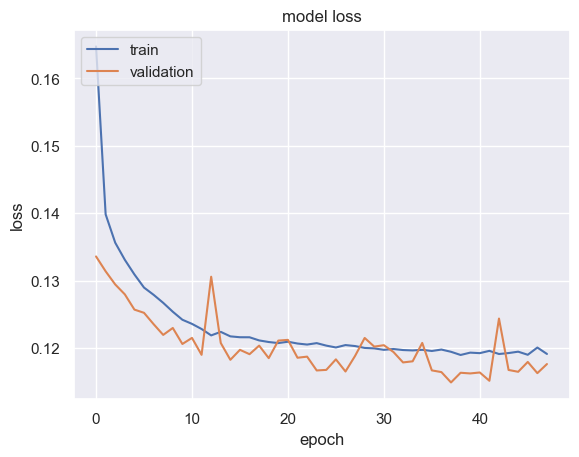

In [68]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [69]:
print('Mean Absolute Error Value is:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error Value is:', mean_squared_error(y_test, y_pred))
print('Median Absolute Error Value is:', median_absolute_error(y_test, y_pred))
print('R2 Squared Value is:', r2_score(y_test, y_pred))

Mean Absolute Error Value is: 0.2532427972070904
Mean Squared Error Value is: 0.11489702055706828
Median Absolute Error Value is: 0.19513867842543076
R2 Squared Value is: 0.8860924655525059


In [71]:
y.min(), y.max()

(-3.2187773174914907, 3.5121648233544973)

### Thank you for exploring this project!